In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd

### Course Enrollment

In [4]:
# # import all data (2012-2018)
# data = []
# for year in range(12, 19):
#   path = f'/content/drive/MyDrive/MDS/Data 294P/Data and Code/CourseEnrollment/CourseEnroll{year}.txt'
#   frame = pd.read_csv(path, delimiter='\t', encoding = 'latin-1',dtype={'DistrictCode': str, 'SchoolCode': str})

#   # add year column
#   frame['year'] = f'20{year}'
#   data.append(frame)

# course_enroll = pd.concat(data, ignore_index=True)
# course_enroll['year'] = course_enroll['year'].astype('int')

# ## uses up too much RAM :(


In [5]:
# course_enroll.to_csv('/content/drive/MyDrive/MDS/Data 294P/Data and Code/CourseEnrollment/course_enroll12_18.csv')

In [6]:
# # Define a function to count columns
# def count_columns(row):
#     return len(row.split('\t'))

# # Read the file line by line
# with open(path, 'r', encoding='latin-1') as file:
#     # Filter lines with exactly 24 columns
#     problematic_lines = [line for line in file if count_columns(line) == 24]

# # Display the filtered lines
# for line in problematic_lines:
#     print(line)

#### High School Course enrollment

Did this outside of Colab because I kept running out of RAM :')

In [7]:
##### RAN THESE OUTSIDE OF COLAB #####

# public_hs = pd.read_csv('publichs.csv', dtype = {'CDSCode': 'str', 'NCESDist': 'str', 'NCESSchool': 'str'})

# cols_to_read = ['year', 'DistrictCode', 'SchoolCode', 'DistrictName', 'SchoolName', 'CourseCode', 'EnrollNoEthRptd', 'EnrollAmInd',
#        'EnrollAsian', 'EnrollPacIsl', 'EnrollFilipino', 'EnrollHispanic',
#        'EnrollAfrAm', 'EnrollWhite', 'EnrollTwoOrMore', 'EnrollTotal']

# course_enroll = pd.read_csv("course_enroll12_18.csv", dtype={'DistrictCode': str, 'SchoolCode': str}, usecols = cols_to_read)

# course_enroll['CDS_CODE'] = course_enroll['DistrictCode'] + course_enroll['SchoolCode']

# course_enroll_hs = course_enroll[course_enroll['CDS_CODE'].isin(public_hs['CDS_CODE'])]

# course_enroll_hs.to_csv('course_enroll_publichs.csv', index = False)

In [8]:
course_enroll_hs = pd.read_csv('/content/drive/MyDrive/MDS/Data 294P/Data and Code/CourseEnrollment/course_enroll_publichs.csv', dtype = {'DistrictCode': 'str', 'SchoolCode': 'str','CDS_CODE': 'str'})

In [9]:
course_enroll_hs.head()

,DistrictCode,SchoolCode,DistrictName,SchoolName,CourseCode,EnrollNoEthRptd,EnrollAmInd,EnrollAsian,EnrollPacIsl,EnrollFilipino,EnrollHispanic,EnrollAfrAm,EnrollWhite,EnrollTwoOrMore,EnrollTotal,year,CDS_CODE
0,5475523,5430251,Porterville Unified,Granite Hills High,2603,0,0,0,0,0,11,0,0,0,11,2012,54755235430251
1,5475523,5432786,Porterville Unified,Monache High,2113,1,0,2,0,2,11,0,3,0,19,2012,54755235432786
2,5475523,5432786,Porterville Unified,Monache High,2300,0,0,1,0,1,12,0,3,0,17,2012,54755235432786
3,5475523,5432786,Porterville Unified,Monache High,2450,0,0,0,0,0,1,0,1,0,2,2012,54755235432786
4,5475523,5432786,Porterville Unified,Monache High,2515,0,0,0,0,0,9,0,7,0,16,2012,54755235432786


#### Course Assignment

In [10]:
course_assignment_full = pd.read_csv('/content/drive/My Drive/MDS/Data 294P/Data and Code/AssignCodes.csv')


In [11]:
course_assignment = course_assignment_full[['AssignmentCode', 'AssignmentName', 'AssignmentSubject']]
course_assignment.head()
print(course_assignment['AssignmentSubject'].unique())

['Administration' 'Self-Contained Class' 'English Language Arts'
 'Foreign Languages' 'Music' 'Dance' 'Mathematics' 'Computer Education'
 'Physical Education' 'Special Designated Subjects' 'Health Education'
 'Other Instruction-Related Assignments' 'Science'
 'History/Social Science' 'Art' 'Drama/Theater'
 'Agriculture and Natural Resources' 'Marketing, Sales, and Service'
 'Hospitality, Tourism, and Recreation' 'Business and Finance'
 'Health Science and Medical Technology'
 'Education, Child Development, and Family Services'
 'Fashion and Interior Design'
 'Information and Communication Technologies' 'Energy and Utilities'
 'Work Experience' 'Building and Construction Trades'
 'Arts, Media, and Entertainment' 'Engineering and Architecture'
 'Manufacturing and Product Development' 'Transportation'
 'Public Services' 'Multiple Industry Sectors' 'Work Experience Education']


In [12]:
## merge courses with assignment codes
course_enrollment_HS = pd.merge(course_enroll_hs, course_assignment,
                             how = 'left',
                             left_on = 'CourseCode', right_on = 'AssignmentCode')

course_enrollment_HS.head()

,DistrictCode,SchoolCode,DistrictName,SchoolName,CourseCode,EnrollNoEthRptd,EnrollAmInd,EnrollAsian,EnrollPacIsl,EnrollFilipino,EnrollHispanic,EnrollAfrAm,EnrollWhite,EnrollTwoOrMore,EnrollTotal,year,CDS_CODE,AssignmentCode,AssignmentName,AssignmentSubject
0,5475523,5430251,Porterville Unified,Granite Hills High,2603,0,0,0,0,0,11,0,0,0,11,2012,54755235430251,2603,Biology,Science
1,5475523,5432786,Porterville Unified,Monache High,2113,1,0,2,0,2,11,0,3,0,19,2012,54755235432786,2113,Composition,English Language Arts
2,5475523,5432786,Porterville Unified,Monache High,2300,0,0,1,0,1,12,0,3,0,17,2012,54755235432786,2300,Band,Music
3,5475523,5432786,Porterville Unified,Monache High,2450,0,0,0,0,0,1,0,1,0,2,2012,54755235432786,2450,Computer literacy,Computer Education
4,5475523,5432786,Porterville Unified,Monache High,2515,0,0,0,0,0,9,0,7,0,16,2012,54755235432786,2515,High School Physical Education II,Physical Education


In [13]:
schools_to_exclude = course_enrollment_HS.groupby('CDS_CODE').filter(lambda x: (x['AssignmentSubject'] == 'Self-Contained Class').all())

In [14]:
schools_reported_courses = course_enrollment_HS[~course_enrollment_HS['CDS_CODE'].isin(schools_to_exclude['CDS_CODE'])]
schools_reported_courses['CDS_CODE'].unique().shape
# exclude schools that didn't report enrollment data (all 'self-contained class')

(1344,)

In [15]:
public_hs = schools_reported_courses[['year', 'CDS_CODE', 'DistrictCode', 'DistrictName', 'SchoolName']].drop_duplicates() # include only all schools that report classes


In [16]:
# arts classes
arts_classes = ['Music', 'Art', 'Dance', 'Drama/Theater', 'Arts, Media, and Entertainment']
schools_with_arts = schools_reported_courses[schools_reported_courses['AssignmentSubject'].isin(arts_classes)]

In [17]:
schools_with_arts.head()

,DistrictCode,SchoolCode,DistrictName,SchoolName,CourseCode,EnrollNoEthRptd,EnrollAmInd,EnrollAsian,EnrollPacIsl,EnrollFilipino,EnrollHispanic,EnrollAfrAm,EnrollWhite,EnrollTwoOrMore,EnrollTotal,year,CDS_CODE,AssignmentCode,AssignmentName,AssignmentSubject
2,5475523,5432786,Porterville Unified,Monache High,2300,0,0,1,0,1,12,0,3,0,17,2012,54755235432786,2300,Band,Music
16,3768130,3730066,Grossmont Union High,Valhalla High,2357,0,0,0,0,0,2,0,1,0,3,2012,37681303730066,2357,"Ballet, Modern, Jazz, World Dance",Dance
29,3768130,3732336,Grossmont Union High,Granite Hills High,2801,0,0,0,0,0,3,0,2,0,5,2012,37681303732336,2801,Design,Art
37,5475523,5434113,Porterville Unified,Porterville High,5716,0,0,0,0,0,1,0,2,0,3,2012,54755235434113,5716,Intermediate Film/Video Production,"Arts, Media, and Entertainment"
39,5475523,5434113,Porterville Unified,Porterville High,2900,0,0,0,0,0,6,0,3,0,9,2012,54755235434113,2900,Theatre/play production (sec sch standards),Drama/Theater


### Time Series
Number of Arts Classes

In [18]:
num_arts_classes_offered = schools_with_arts.groupby(['year', 'CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']).agg(
    num_classes = pd.NamedAgg(column = 'CourseCode', aggfunc = 'nunique')).reset_index()
num_arts_classes_offered.head()

,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes
0,2012,01100170118489,0110017,Alameda County Office of Education,Aspire California College Preparatory Academy,2
1,2012,01611190130229,0161119,Alameda City Unified,Alameda High,11
2,2012,01611190132878,0161119,Alameda City Unified,Encinal High,13
3,2012,01611270130450,0161127,Albany City Unified,Albany High,9
4,2012,01611430122697,0161143,Berkeley Unified,REALM High,4


In [19]:
schools_with_arts[['year', 'CDS_CODE']].drop_duplicates().shape


(8363, 2)

In [20]:
public_hs['CDS_CODE'].unique().shape

(1344,)

In [21]:
# merge with rest of schools and replace with 0s
public_hs_arts = pd.merge(public_hs,
                          num_arts_classes_offered,
                          how = 'left',
                          on = ['year', 'CDS_CODE', 'DistrictCode', 'DistrictName', 'SchoolName'])

In [22]:
public_hs_arts = public_hs_arts.fillna(0)


In [23]:
public_hs_arts[public_hs_arts.isna().any(axis=1)].head()


,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes


In [24]:
district_arts = public_hs_arts.groupby(['year','DistrictCode'])['num_classes'].mean().reset_index()


In [25]:
district_arts['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [26]:
district_arts.head(20)

,year,DistrictCode,num_classes
0,2012,0110017,2.000000
1,2012,0161119,12.000000
2,2012,0161127,9.000000
3,2012,0161143,12.000000
4,2012,0161150,16.000000
5,2012,0161168,4.000000
6,2012,0161176,11.800000
7,2012,0161192,8.600000
8,2012,0161200,10.000000
9,2012,0161234,16.000000


#### Map

In [27]:
ca_districts_shp = gpd.read_file('/content/drive/MyDrive/MDS/Data 294P/Data and Code/DistrictAreas1819/DistrictAreas1819.shp')

In [28]:
ca_districts_shp.head()

,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,...,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,geometry
0,2018-19,0601770,0161119,01611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,...,56.8,11453,9.4,882,88.9,58.9,5.2,11600,2.6,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
1,2018-19,0601860,0161127,01611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,...,62.6,3763,6.4,301,94.7,63.9,1.7,3830,1.9,"POLYGON ((-13612889.056 4565138.930, -13612899..."
2,2018-19,0604740,0161143,01611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,...,63.3,10404,9.7,856,87.4,83.3,10.7,10534,1.4,"POLYGON ((-13609481.010 4565073.896, -13609482..."
3,2018-19,0607800,0161150,01611500000000,Alameda,Castro Valley Unified,Unified,KG,12,KG,...,57.1,9433,7.4,742,92.6,55.9,3.0,9532,2.2,"MULTIPOLYGON (((-13581537.591 4528171.452, -13..."
4,2018-19,0612630,0161168,01611680000000,Alameda,Emery Unified,Unified,KG,12,KG,...,22.5,760,20.5,40,100.0,40.0,0.0,780,3.6,"POLYGON ((-13614035.309 4555653.898, -13613927..."


In [29]:
districtarts_join = pd.merge(ca_districts_shp, district_arts, left_on='CDCode', right_on='DistrictCode', how='left')
districtarts_join = districtarts_join[['year', 'FedID', 'CDCode', 'DistrictNa', 'num_classes', 'geometry']]
districtarts_join.head()

,year,FedID,CDCode,DistrictNa,num_classes,geometry
0,2012.0,0601770,0161119,Alameda Unified,12.0,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
1,2013.0,0601770,0161119,Alameda Unified,11.5,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
2,2014.0,0601770,0161119,Alameda Unified,12.0,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
3,2015.0,0601770,0161119,Alameda Unified,15.0,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
4,2016.0,0601770,0161119,Alameda Unified,15.0,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."


In [30]:
# color map
#4db6ac light blue
#ef6c02 clementine
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


start_color = "#0c195c"
mid_color = "#4db6ac"  # blue
end_color = "#bdf0e9"

# Create a new colormap with these colors
custom_col = LinearSegmentedColormap.from_list("custom_col", [start_color, mid_color, end_color], N=256)


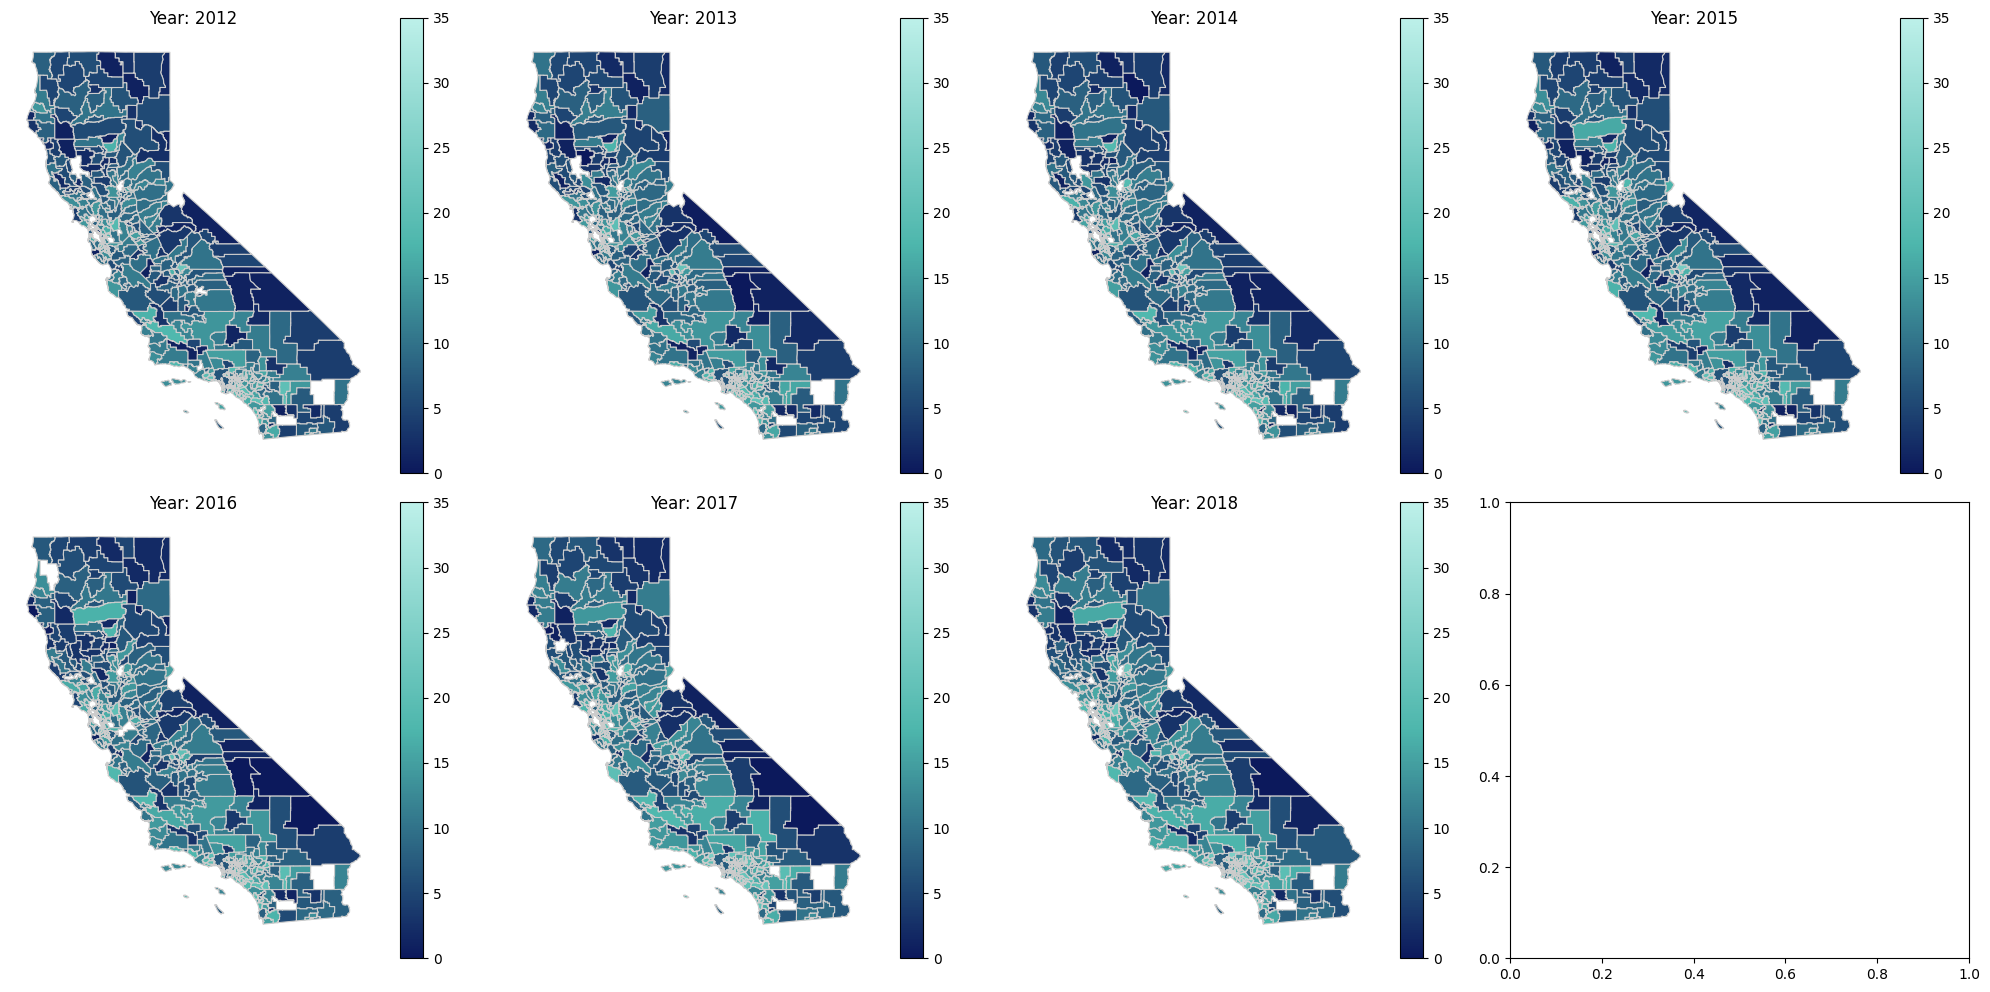

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Adjust rows/columns as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

vmin = districtarts_join['num_classes'].min()
vmax = districtarts_join['num_classes'].max()

years = range(2012,2019)
for i, year in enumerate(years):
    # Filter the data for the specific year
    yearly_data = districtarts_join[districtarts_join['year'] == year]

    # Plot on the corresponding subplot
    yearly_data.plot(column='num_classes',
                     cmap=custom_col,
                     linewidth=0.8,
                     ax=axes[i],
                     edgecolor='0.8',
                     legend=True,
                     vmin=vmin,
                     vmax=vmax)

    # Set the title for each subplot
    axes[i].set_title(f'Year: {year}')
    axes[i].axis('off')  # Remove axis for a cleaner look

# Adjust spacing between plots
plt.tight_layout()
plt.show()

#### Plot time series line graph
5 most increased and decreased

##### Getting top increase/decrease

In [32]:
district_art_pivot = district_arts.pivot(index='DistrictCode', columns='year', values='num_classes')

In [33]:
district_art_pivot.head()

year,2012,2013,2014,2015,2016,2017,2018
DistrictCode,,,,,,,
0110017,2.0,2.0,2.0,NaN,NaN,NaN,NaN
0161119,12.0,11.5,12.0,15.0,15.0,18.0,18.0
0161127,9.0,10.0,13.0,11.0,11.0,12.0,11.0
0161143,12.0,12.0,14.5,14.5,13.5,14.5,29.0
0161150,16.0,18.0,18.0,20.0,18.0,18.0,21.0


In [34]:
district_art_pivot['diff'] = district_art_pivot[2018] - district_art_pivot[2012]

In [35]:
district_art_pivot.head()

year,2012,2013,2014,2015,2016,2017,2018,diff
DistrictCode,,,,,,,,
0110017,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
0161119,12.0,11.5,12.0,15.0,15.0,18.0,18.0,6.0
0161127,9.0,10.0,13.0,11.0,11.0,12.0,11.0,2.0
0161143,12.0,12.0,14.5,14.5,13.5,14.5,29.0,17.0
0161150,16.0,18.0,18.0,20.0,18.0,18.0,21.0,5.0


In [36]:
top_increase_arts = district_art_pivot.nlargest(10, 'diff')
top_decrease_arts = district_art_pivot.nsmallest(10, 'diff')


In [399]:
top_increase_arts

year,2012,2013,2014,2015,2016,2017,2018,diff
DistrictCode,,,,,,,,
0161143,12.000000,12.0,14.500000,14.500000,13.5,14.5,29.0,17.000000
3473973,4.000000,6.0,8.000000,7.000000,7.5,18.0,18.0,14.000000
4975358,9.500000,14.0,15.000000,17.000000,16.0,20.0,23.0,13.500000
3166951,10.000000,12.0,19.000000,18.000000,15.0,19.0,22.0,12.000000
1965094,8.333333,14.0,9.666667,10.666667,17.0,18.0,20.0,11.666667
5471993,6.000000,7.0,8.000000,9.000000,13.0,20.0,17.0,11.000000
1964469,8.000000,9.0,9.000000,11.000000,11.0,13.0,18.5,10.500000
5271639,5.500000,7.0,10.000000,16.000000,17.0,14.0,16.0,10.500000
1073809,8.000000,8.0,8.000000,8.000000,9.0,9.0,18.0,10.000000


In [400]:
top_decrease_arts

year,2012,2013,2014,2015,2016,2017,2018,diff
DistrictCode,,,,,,,,
0710074,17.0,19.0,9.5,9.0,8.5,8.5,7.333333,-9.666667
0461432,7.0,5.0,6.0,4.0,2.0,3.0,2.000000,-5.000000
0973783,12.0,8.0,8.0,10.0,9.0,9.0,7.000000,-5.000000
1964303,20.5,20.0,19.5,15.5,14.5,17.0,15.500000,-5.000000
1964444,17.0,15.0,18.0,15.0,13.0,13.0,12.000000,-5.000000
3768031,34.0,31.0,30.0,31.0,35.0,28.0,29.000000,-5.000000
5071068,8.0,5.0,3.0,4.0,4.0,3.0,3.000000,-5.000000
5271506,10.0,11.0,11.0,11.0,10.0,9.0,5.500000,-4.500000
2365581,10.0,8.0,10.0,10.0,11.0,6.0,6.000000,-4.000000


In [37]:
increase_shp = districtarts_join[districtarts_join['CDCode'].isin(top_increase_arts.index)]
decrease_shp = districtarts_join[districtarts_join['CDCode'].isin(top_decrease_arts.index)]

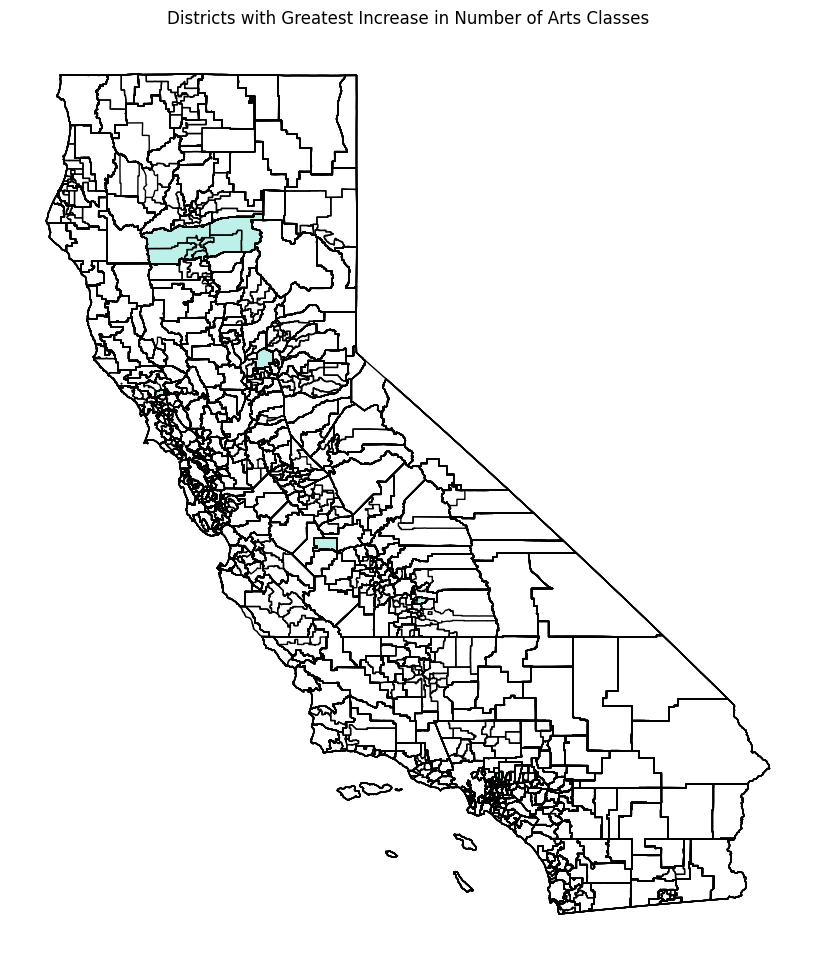

In [38]:
fig, ax = plt.subplots(figsize=(12, 12))

districtarts_join.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot highlighted districts
highlighted = districtarts_join[districtarts_join['CDCode'].isin(top_increase_arts.index)]
highlighted.plot(ax=ax, color='#bdf0e9')

# Plot non-highlighted districts
non_highlighted = districtarts_join[~districtarts_join['CDCode'].isin(top_increase_arts.index)]
non_highlighted.plot(ax=ax, color='none', edgecolor='black',linewidth=.01)

# Add labels and title
plt.title('Districts with Greatest Increase in Number of Arts Classes')
ax.axis('off')
plt.show()

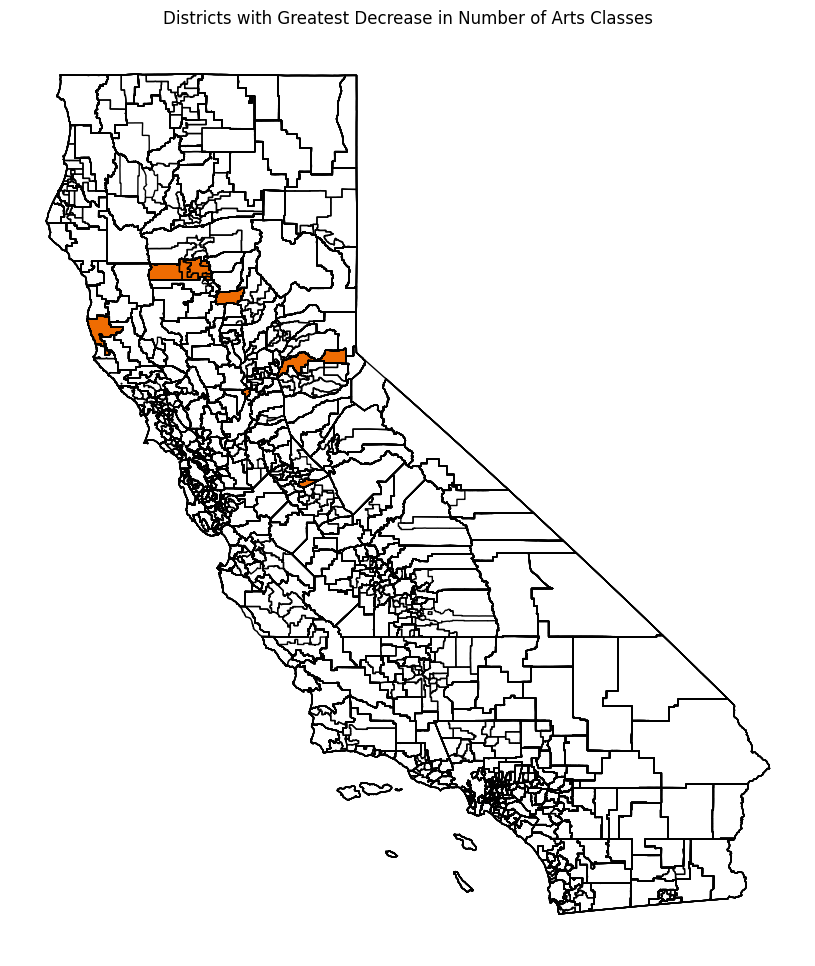

In [39]:
fig, ax = plt.subplots(figsize=(12, 12))

districtarts_join.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot highlighted districts
highlighted = districtarts_join[districtarts_join['CDCode'].isin(top_decrease_arts.index)]
highlighted.plot(ax=ax, color='#ef6c02')

# Plot non-highlighted districts
non_highlighted = districtarts_join[~districtarts_join['CDCode'].isin(top_decrease_arts.index)]
non_highlighted.plot(ax=ax, color='none', edgecolor='black',linewidth=.01)

# Add labels and title
plt.title('Districts with Greatest Decrease in Number of Arts Classes')
ax.axis('off')
plt.show()

In [47]:
time_series_inc = pd.melt(top_increase_arts.reset_index().drop(columns=['diff']),
                  id_vars=['DistrictCode'],  # Columns to keep as is
                  var_name='year',            # Name of the new column for year
                  value_name='num_classes')
time_series_dec = pd.melt(top_decrease_arts.reset_index().drop(columns=['diff']),
                  id_vars=['DistrictCode'],  # Columns to keep as is
                  var_name='year',            # Name of the new column for year
                  value_name='num_classes')

In [48]:
time_series_inc

,DistrictCode,year,num_classes
0,0161143,2012,12.000000
1,3473973,2012,4.000000
2,4975358,2012,9.500000
3,3166951,2012,10.000000
4,1965094,2012,8.333333
...,...,...,...
65,5471993,2018,17.000000
66,1964469,2018,18.500000
67,5271639,2018,16.000000
68,1073809,2018,18.000000


In [49]:
import matplotlib.colors as mcolors
import numpy as np

sorted_districts = top_increase_arts.sort_values(by = 2018, ascending = True).index
sorted_districts_dec = top_decrease_arts.sort_values(by = 2018, ascending = False).index


# # Create a custom colormap
custom_colormap = plt.get_cmap(custom_col)  # You can use any built-in or custom colormap
custom_colormap_dec = plt.get_cmap('Oranges')  # You can use any built-in or custom colormap

# Number of colors you want to extract
num_colors = 10

# Create an array of evenly spaced values between 0 and 1
norm = np.linspace(0, 1, num_colors)

# Use these values to get colors from the colormap
colors = custom_colormap(norm)
colors_dec = custom_colormap_dec(norm)


In [50]:
color_mapping = dict(zip(sorted_districts, colors))

color_mapping_dec =dict(zip(sorted_districts_dec, colors_dec))


In [51]:
time_series_inc

,DistrictCode,year,num_classes
0,0161143,2012,12.000000
1,3473973,2012,4.000000
2,4975358,2012,9.500000
3,3166951,2012,10.000000
4,1965094,2012,8.333333
...,...,...,...
65,5471993,2018,17.000000
66,1964469,2018,18.500000
67,5271639,2018,16.000000
68,1073809,2018,18.000000


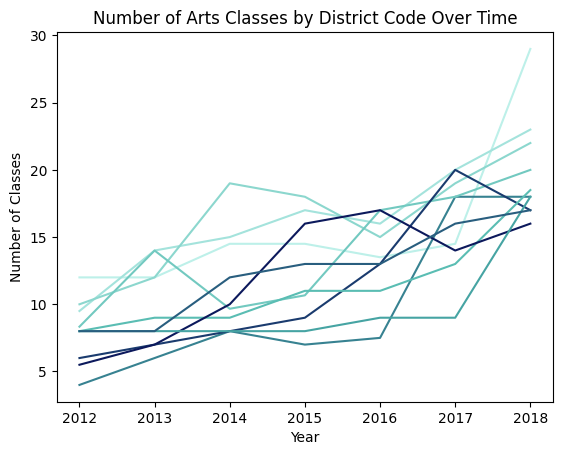

In [53]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
for district in time_series_inc['DistrictCode'].unique():
    district_data = time_series_inc[time_series_inc['DistrictCode'] == district]
    ax.plot(district_data['year'], district_data['num_classes'],
            label=district,
            color=color_mapping.get(district, 'black'))  # Use black if the color is not found

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of Classes')
ax.set_title('Number of Arts Classes by District Code Over Time')

plt.show()

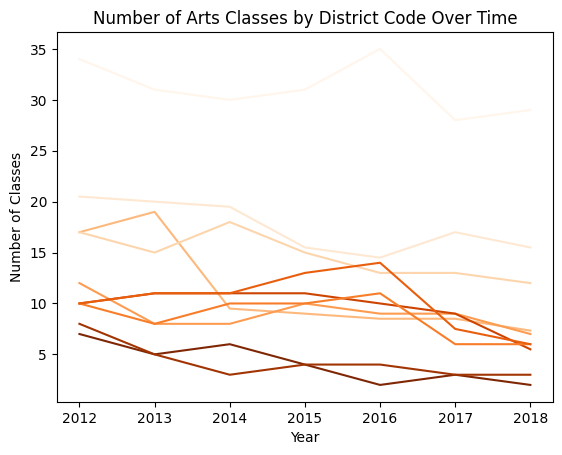

In [54]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
for district in time_series_dec['DistrictCode'].unique():
    district_data = time_series_dec[time_series_dec['DistrictCode'] == district]
    ax.plot(district_data['year'], district_data['num_classes'],
            label=district,
            color=color_mapping_dec.get(district, 'black'))  # Use black if the color is not found

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of Classes')
ax.set_title('Number of Arts Classes by District Code Over Time')

plt.show()

<Axes: xlabel='year'>

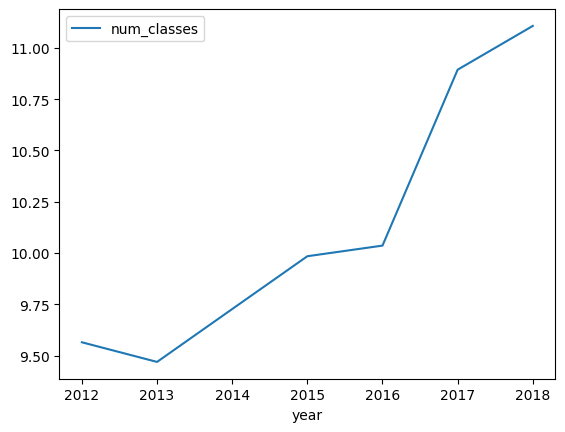

In [55]:
district_arts_mean = district_arts.groupby('year')['num_classes'].mean().reset_index()
district_arts_mean.plot(x = 'year', y = 'num_classes')

##### Testing on one district

<Axes: title={'center': 'Mean Number of Arts Classes (Berkeley Unified)'}, xlabel='year'>

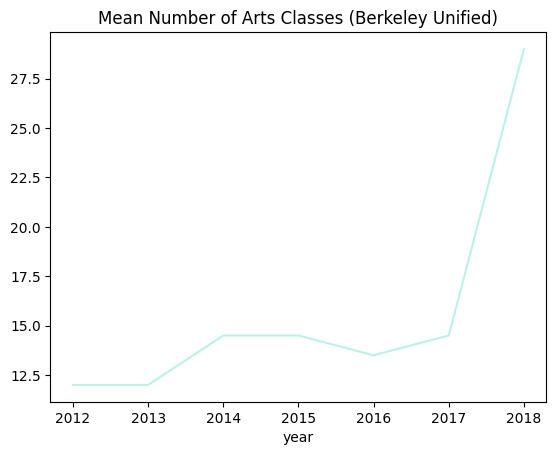

In [56]:
filtered_greatest = district_arts[district_arts['DistrictCode'] == '0161143']
filtered_greatest.plot(x = 'year',  y = 'num_classes', color = '#bdf0e9', title = 'Mean Number of Arts Classes (Berkeley Unified)', legend = False)

In [57]:
filtered_greatest

,year,DistrictCode,num_classes
3,2012,0161143,12.0
435,2013,0161143,12.0
875,2014,0161143,14.5
1312,2015,0161143,14.5
1751,2016,0161143,13.5
2190,2017,0161143,14.5
2628,2018,0161143,29.0


In [58]:
district_arts.head()

,year,DistrictCode,num_classes
0,2012,0110017,2.0
1,2012,0161119,12.0
2,2012,0161127,9.0
3,2012,0161143,12.0
4,2012,0161150,16.0


### Free Lunch Qualification

#### Data Cleaning
Get public high schools

In [322]:
frmp_1819 = pd.read_csv('/content/drive/MyDrive/MDS/Data 294P/Data and Code/frpm1819.csv', dtype={'County Code': str,'District Code': str, 'School Code': str})
frmp_1819.head()
frmp_1819['CDS_CODE'] = frmp_1819['County Code'] + frmp_1819['District Code'] + frmp_1819['School Code']
frmp_1819.head()

,Academic Year,County Code,District Code,School Code,County Name,District Name,School Name,District Type,School Type,Educational Option Type,...,Percent (%) Eligible Free (K-12),FRPM Count (K-12),Percent (%) Eligible FRPM (K-12),Enrollment (Ages 5-17),Free Meal Count (Ages 5-17),Percent (%) Eligible Free (Ages 5-17),FRPM Count (Ages 5-17),Percent (%) Eligible FRPM (Ages 5-17),CALPADS Fall 1 Certification Status,CDS_CODE
0,2018-2019,01,10017,0112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,County Office of Education (COE),High Schools (Public),Traditional,...,68.1%,306,79.5%,370,249,67.3%,291,78.6%,Y,01100170112607
1,2018-2019,01,10017,0123968,Alameda,Alameda County Office of Education,Community School for Creative Education,County Office of Education (COE),Elementary Schools (Public),Traditional,...,49.0%,120,49.8%,224,113,50.4%,115,51.3%,Y,01100170123968
2,2018-2019,01,10017,0124172,Alameda,Alameda County Office of Education,Yu Ming Charter,County Office of Education (COE),Elementary Schools (Public),Traditional,...,13.0%,64,14.4%,445,58,13.0%,64,14.4%,Y,01100170124172
3,2018-2019,01,10017,0125567,Alameda,Alameda County Office of Education,Urban Montessori Charter,County Office of Education (COE),Elementary Schools (Public),Traditional,...,26.2%,131,30.3%,418,111,26.6%,129,30.9%,Y,01100170125567
4,2018-2019,01,10017,0130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,County Office of Education (COE),Juvenile Court Schools,Juvenile Court School,...,100.0%,53,100.0%,50,50,100.0%,50,100.0%,Y,01100170130401


In [323]:
frmp_1819['DistrictCode'] = frmp_1819['County Code'] + frmp_1819['District Code'] #make district code the same format as other data table

In [324]:
frmp_1819['School Type'].unique() #see all school types

array(['High Schools (Public)', 'Elementary Schools (Public)',
       'Juvenile Court Schools', 'County Community',
       'Intermediate/Middle Schools (Public)', 'K-12 Schools (Public)',
       'Junior High Schools (Public)', 'State Special Schools', nan,
       'Alternative Schools of Choice', 'Continuation High Schools',
       'Special Education Schools (Public)',
       'Elemen Schools In 1 School Dist. (Public)',
       'District Community Day Schools', 'Opportunity Schools',
       'High Schools In 1 School Dist. (Public)', 'Preschool',
       'Youth Authority Facilities'], dtype=object)

In [325]:
frmp_1819_public_hs = frmp_1819[frmp_1819['School Type'] == 'High Schools (Public)'] #get public high schools

In [326]:
public_hs = frmp_1819_public_hs['CDS_CODE'].unique()

In [64]:
# publicHS = pd.DataFrame(public_hs, columns = ['CDS_CODE'])

In [65]:
# publicHS.to_csv('public_hs.csv', index = False)

In [327]:
len(public_hs)

1315

In [328]:
frmp_1819_public_hs.columns

Index(['Academic Year', 'County Code', 'District Code', 'School Code',
       'County Name', 'District Name', 'School Name', 'District Type',
       'School Type', 'Educational Option Type', 'NSLP Provision Status',
       'Charter School (Y/N)', 'Charter School Number', 'Charter Funding Type',
       'IRC', 'Low Grade', 'High Grade', 'Enrollment (K-12)',
       'Free Meal Count (K-12)', 'Percent (%) Eligible Free (K-12)',
       'FRPM Count (K-12)', 'Percent (%) Eligible FRPM (K-12)',
       'Enrollment (Ages 5-17)', 'Free Meal Count (Ages 5-17)',
       'Percent (%) Eligible Free (Ages 5-17)', 'FRPM Count (Ages 5-17)',
       'Percent (%) Eligible FRPM (Ages 5-17)',
       'CALPADS Fall 1 Certification Status', 'CDS_CODE', 'DistrictCode'],
      dtype='object')

In [329]:
frmp_1819_public_hs = frmp_1819_public_hs[['CDS_CODE', 'DistrictCode','District Name', 'School Name', 'Percent (%) Eligible Free (K-12)', 'Percent (%) Eligible FRPM (K-12)']]
print(frmp_1819_public_hs.shape)
frmp_1819_public_hs.head() #get useful columns

(1315, 6)


,CDS_CODE,DistrictCode,District Name,School Name,Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12)
0,01100170112607,0110017,Alameda County Office of Education,Envision Academy for Arts & Technology,68.1%,79.5%
20,01611190130229,0161119,Alameda Unified,Alameda High,19.6%,21.0%
22,01611190130625,0161119,Alameda Unified,Alternatives in Action,90.1%,94.6%
38,01611270130450,0161127,Albany City Unified,Albany High,16.3%,18.3%
44,01611430131177,0161143,Berkeley Unified,Berkeley High,23.4%,26.1%


In [330]:
frmp_1819_public_hs.dtypes

,0
CDS_CODE,object
DistrictCode,object
District Name,object
School Name,object
Percent (%) Eligible Free (K-12),object
Percent (%) Eligible FRPM (K-12),object


In [331]:
# change percentages to numeric
frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'] = frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'].str.replace('%', '')
frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'] = frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'].str.replace('%', '')
frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'] = pd.to_numeric(frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'])
frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'] = pd.to_numeric(frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'])

In [332]:
frmp_1819_public_hs.head()

,CDS_CODE,DistrictCode,District Name,School Name,Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12)
0,01100170112607,0110017,Alameda County Office of Education,Envision Academy for Arts & Technology,68.1,79.5
20,01611190130229,0161119,Alameda Unified,Alameda High,19.6,21.0
22,01611190130625,0161119,Alameda Unified,Alternatives in Action,90.1,94.6
38,01611270130450,0161127,Albany City Unified,Albany High,16.3,18.3
44,01611430131177,0161143,Berkeley Unified,Berkeley High,23.4,26.1


#### FRPM Visualization

[Text(0.5, 0, 'Percent Eligible for Free Lunch'),
 Text(0, 0.5, 'Number of Schools')]

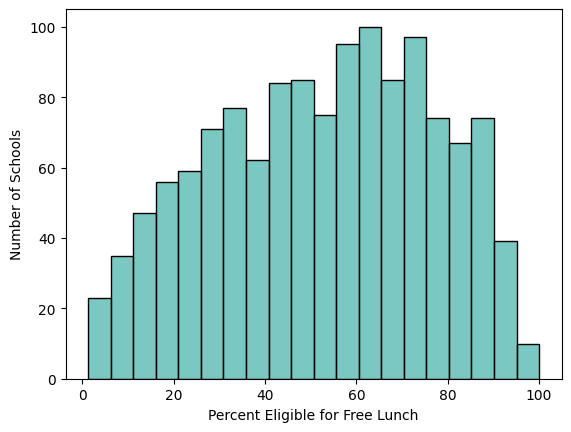

In [333]:
sns.histplot(data = frmp_1819_public_hs, x = 'Percent (%) Eligible Free (K-12)', color = '#4db6ac', binwidth= 5).set(
    xlabel = "Percent Eligible for Free Lunch", ylabel = "Number of Schools")

[Text(0.5, 0, 'Percent Eligible for FRPM'), Text(0, 0.5, 'Number of Schools')]

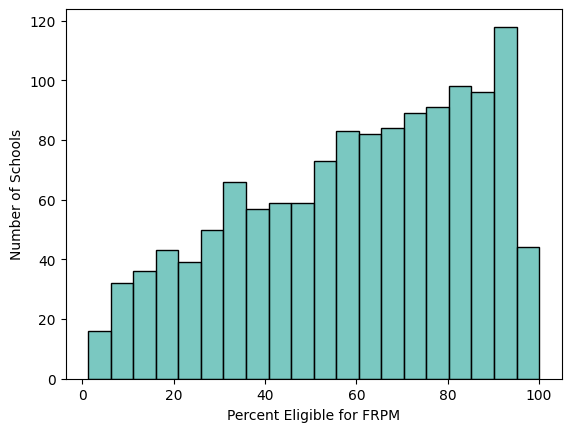

In [334]:
sns.histplot(data = frmp_1819_public_hs, x = 'Percent (%) Eligible FRPM (K-12)', color = '#4db6ac', binwidth = 5).set(
    xlabel = "Percent Eligible for FRPM", ylabel = "Number of Schools")

In [335]:
# District means
frmp_mean = frmp_1819_public_hs.groupby('DistrictCode').agg({
    'Percent (%) Eligible Free (K-12)': 'mean',
    'Percent (%) Eligible FRPM (K-12)': 'mean'
}).reset_index()

frmp_mean.head()

,DistrictCode,Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12)
0,0110017,68.10,79.5
1,0161119,54.85,57.8
2,0161127,16.30,18.3
3,0161143,23.40,26.1
4,0161150,18.30,22.2


[Text(0.5, 0, 'Percent Eligible for Free Lunch'),
 Text(0, 0.5, 'Number of Districts')]

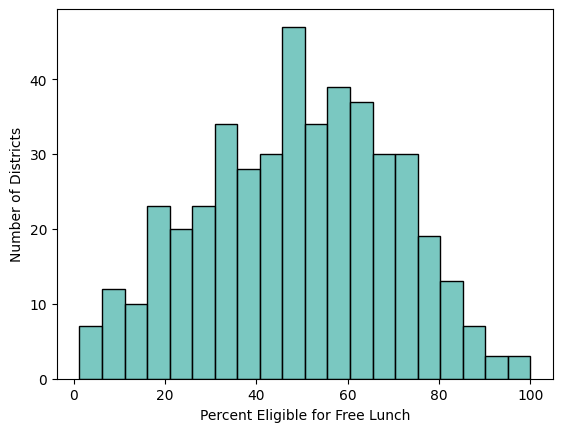

In [336]:
sns.histplot(data = frmp_mean, x = 'Percent (%) Eligible Free (K-12)', color = '#4db6ac', binwidth= 5).set(
    xlabel = "Percent Eligible for Free Lunch", ylabel = "Number of Districts")

In [337]:
district_frmp_join = pd.merge(ca_districts_shp, frmp_mean, left_on='CDCode', right_on='DistrictCode', how='left')
district_frmp_join = district_frmp_join[['Year', 'FedID', 'CDCode', 'DistrictNa', 'Percent (%) Eligible Free (K-12)', 'Percent (%) Eligible FRPM (K-12)', 'geometry']]

In [338]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

end_color = "#0c195c"
mid_color = "#4db6ac"  # blue
start_color = "#bdf0e9"    # clementine

# Create a new colormap with these colors
custom_col1 = LinearSegmentedColormap.from_list("custom_col1", [start_color, mid_color, end_color], N=256)


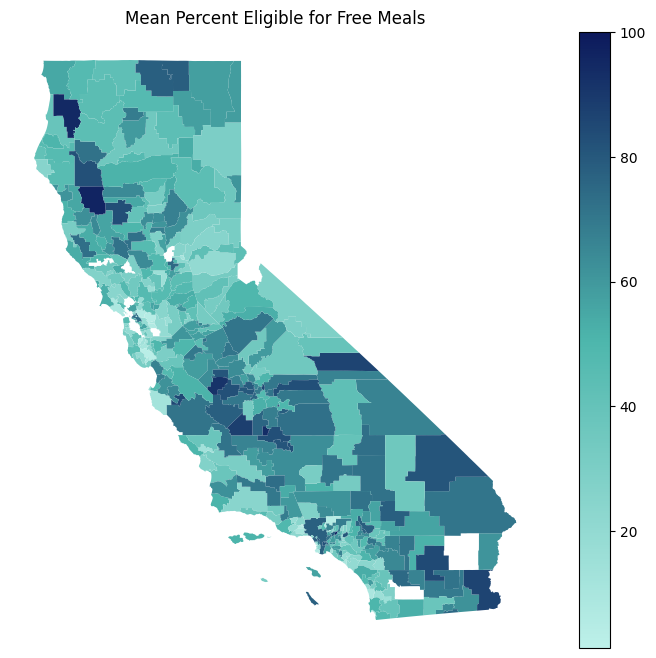

In [339]:
# district_frmp_join.plot(column='Percent (%) Eligible Free (K-12)', cmap=custom_col1, legend=True)

fig, ax = plt.subplots(figsize=(10, 8))
district_frmp_join.plot(column='Percent (%) Eligible Free (K-12)', cmap=custom_col1, legend=True, ax=ax)

# Customize the plot
ax.set_title('Mean Percent Eligible for Free Meals')
ax.set_axis_off()

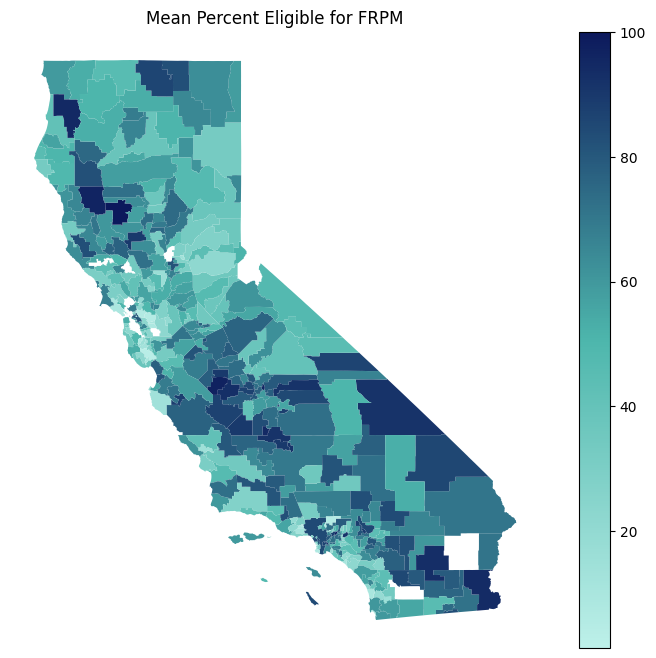

In [340]:
fig, ax = plt.subplots(figsize=(10, 8))
district_frmp_join.plot(column='Percent (%) Eligible FRPM (K-12)', cmap=custom_col1, legend=True, ax=ax)

# Customize the plot
ax.set_title('Mean Percent Eligible for FRPM')
ax.set_axis_off()

In [341]:
public_hs_arts.head()

,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes
0,2012,54755235430251,5475523,Porterville Unified,Granite Hills High,11.0
1,2012,54755235432786,5475523,Porterville Unified,Monache High,14.0
2,2012,54755235434931,5475523,Porterville Unified,Strathmore High,5.0
3,2012,54755230116590,5475523,Porterville Unified,Harmony Magnet Academy,12.0
4,2012,37681303730066,3768130,Grossmont Union High,Valhalla High,21.0


In [342]:
frmp_1819_public_hs.head()

,CDS_CODE,DistrictCode,District Name,School Name,Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12)
0,01100170112607,0110017,Alameda County Office of Education,Envision Academy for Arts & Technology,68.1,79.5
20,01611190130229,0161119,Alameda Unified,Alameda High,19.6,21.0
22,01611190130625,0161119,Alameda Unified,Alternatives in Action,90.1,94.6
38,01611270130450,0161127,Albany City Unified,Albany High,16.3,18.3
44,01611430131177,0161143,Berkeley Unified,Berkeley High,23.4,26.1


In [353]:
public_hs_arts18 = public_hs_arts[public_hs_arts['year'] == 2018]

In [354]:
frpm_arts = pd.merge(public_hs_arts18, frmp_1819_public_hs, how = 'inner', left_on = 'CDS_CODE', right_on = 'CDS_CODE')
frpm_arts.drop(columns = ['District Name', 'School Name', 'DistrictCode_y'], inplace = True)
frpm_arts.rename(columns = {'DistrictCode_x': 'DistrictCode'}, inplace = True)
frpm_arts.head()

,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes,Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12)
0,2018,01612340130054,0161234,Newark Unified,Newark Memorial High,22.0,39.2,45.5
1,2018,04100410134213,0410041,Butte County Office of Education,Come Back Butte Charter,2.0,80.3,90.2
2,2018,01612750136515,0161275,Piedmont City Unified,Piedmont High,12.0,1.3,1.3
3,2018,16639820136234,1663982,Lemoore Union High,Lemoore Online College Preparatory High,1.0,30.8,42.3
4,2018,16639820110205,1663982,Lemoore Union High,Lemoore Middle College High,2.0,23.7,27.5


In [355]:
# per district?
frpm_arts_district = frpm_arts.groupby('DistrictCode').agg({
    'Percent (%) Eligible Free (K-12)': 'mean',
    'Percent (%) Eligible FRPM (K-12)': 'mean',
    'num_classes': 'mean'
}).reset_index()

In [356]:
frpm_arts_district.corr()

,DistrictCode,Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12),num_classes
DistrictCode,1.000000,-0.062340,-0.064526,-0.005399
Percent (%) Eligible Free (K-12),-0.062340,1.000000,0.985369,-0.488183
Percent (%) Eligible FRPM (K-12),-0.064526,0.985369,1.000000,-0.475126
num_classes,-0.005399,-0.488183,-0.475126,1.000000


[Text(0, 0.5, 'Mean Number of Classes'),
 Text(0.5, 1.0, 'Number of Classes vs % Free Meal Qualification per School District')]

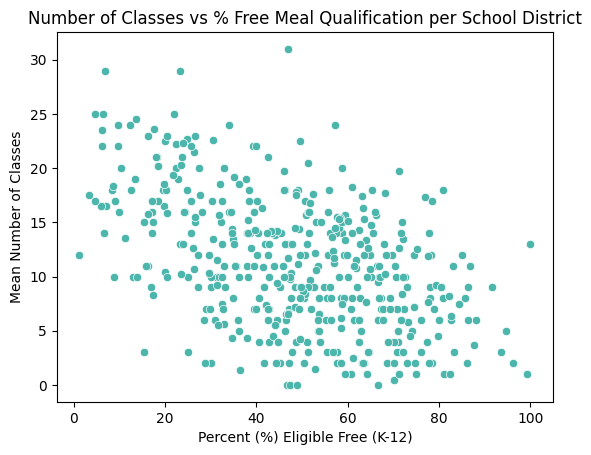

In [357]:
sns.scatterplot(data = frpm_arts_district, x = 'Percent (%) Eligible Free (K-12)', y = 'num_classes', color = '#4db6ac').set(
    ylabel = 'Mean Number of Classes', title = 'Number of Classes vs % Free Meal Qualification per School District')

[Text(0, 0.5, 'Mean Number of Classes'),
 Text(0.5, 1.0, 'Number of Classes vs % FRPM Qualification per School District')]

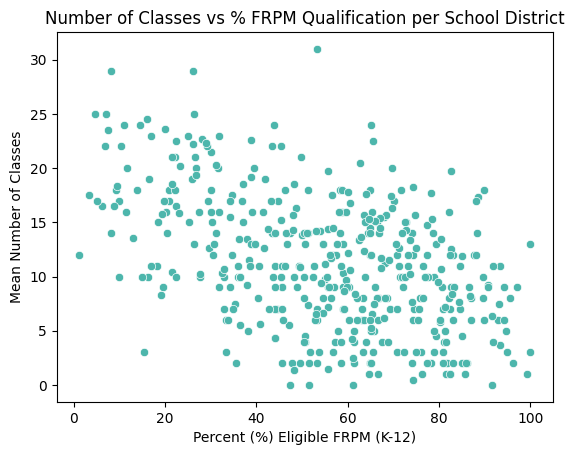

In [358]:
sns.scatterplot(data = frpm_arts_district, x = 'Percent (%) Eligible FRPM (K-12)', y = 'num_classes', color = '#4db6ac').set(
    ylabel = 'Mean Number of Classes', title = 'Number of Classes vs % FRPM Qualification per School District')

#### Significance Test

In [384]:
# Testing if there is a significant difference in number of arts classes beween high and low poverty schools
frpm_arts_pov = frpm_arts
frpm_arts_pov['Poverty_Level'] = pd.cut(frpm_arts['Percent (%) Eligible Free (K-12)'], bins=[0,25,50,75,100], labels=['Low', 'MidLow', 'MidHigh', 'High'], right=False)

frpm_arts_pov.head()


,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes,Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12),Poverty_Level
0,2018,01612340130054,0161234,Newark Unified,Newark Memorial High,22.0,39.2,45.5,MidLow
1,2018,04100410134213,0410041,Butte County Office of Education,Come Back Butte Charter,2.0,80.3,90.2,High
2,2018,01612750136515,0161275,Piedmont City Unified,Piedmont High,12.0,1.3,1.3,Low
3,2018,16639820136234,1663982,Lemoore Union High,Lemoore Online College Preparatory High,1.0,30.8,42.3,MidLow
4,2018,16639820110205,1663982,Lemoore Union High,Lemoore Middle College High,2.0,23.7,27.5,Low


[Text(0.5, 0, 'Poverty Level (Free Meals)'),
 Text(0, 0.5, 'Number of Arts Classes Offered')]

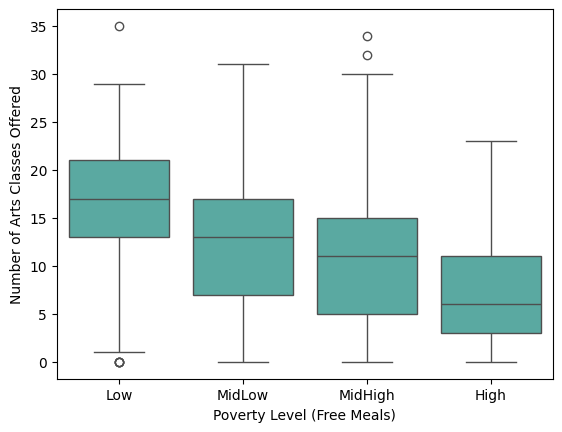

In [385]:
sns.boxplot(data=frpm_arts_pov, x='Poverty_Level', y='num_classes', color = '#4db6ac').set(
    xlabel = 'Poverty Level (Free Meals)', ylabel = 'Number of Arts Classes Offered'
)

In [386]:
# poverty level num classes mean
mean_arts_pov = frpm_arts_pov.groupby('Poverty_Level')['num_classes'].mean().reset_index()
mean_arts_pov

<ipython-input-386-21aeba6d3f21>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_arts_pov = frpm_arts_pov.groupby('Poverty_Level')['num_classes'].mean().reset_index()


,Poverty_Level,num_classes
0,Low,16.782178
1,MidLow,12.277778
2,MidHigh,10.827982
3,High,7.587234


In [387]:
observedVariance =  mean_arts_pov['num_classes'].var()
observedVariance

14.57455273889358

In [388]:
frpm_arts_pov.groupby('Poverty_Level')['num_classes'].count().reset_index()


<ipython-input-388-098c5c83fff7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frpm_arts_pov.groupby('Poverty_Level')['num_classes'].count().reset_index()


,Poverty_Level,num_classes
0,Low,202
1,MidLow,360
2,MidHigh,436
3,High,235


In [389]:
singleBox = frpm_arts_pov['num_classes']
sampleLow = singleBox.sample(202, replace=True)
sampleMidL = singleBox.sample(360, replace=True)
sampleMidH = singleBox.sample(436, replace=True)
sampleHigh = singleBox.sample(235, replace=True)
sampleDataFrame = pd.DataFrame([sampleLow.values, sampleMidL.values,sampleMidH.values, sampleHigh.values]).T
sampleDataFrame.mean().var()

0.09621164169641032

In [390]:
singleBox

,num_classes
0,22.0
1,2.0
2,12.0
3,1.0
4,2.0
...,...
1233,11.0
1234,16.0
1235,12.0
1236,1.0


In [391]:
import numpy as np

def permutationTest(num_arts_df):
  singleBox = frpm_arts_pov['num_classes']
  sampleLow = singleBox.sample(153, replace=True)
  sampleMidL = singleBox.sample(285, replace=True)
  sampleMidH = singleBox.sample(417, replace=True)
  sampleHigh = singleBox.sample(440, replace=True)
  sampleDataFrame = pd.DataFrame([sampleLow.values, sampleMidL.values,sampleMidH.values, sampleHigh.values]).T
  return sampleDataFrame.mean().var()

permutationVariance = [permutationTest(red_arts_pov) for _ in range(3000)]
prob = np.mean([var > observedVariance for var in permutationVariance])
prob

0.0

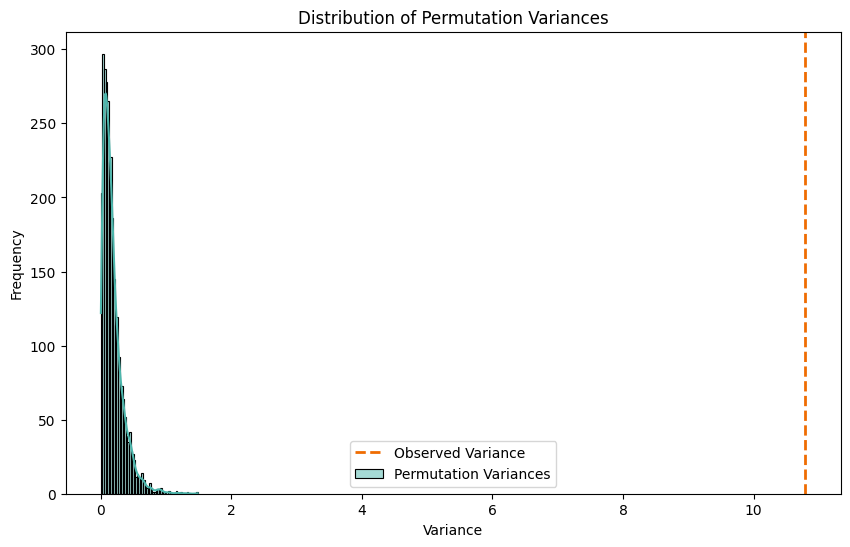

In [392]:
plt.figure(figsize=(10, 6))
sns.histplot(permutationVariance, kde=True, color='#4db6ac', label='Permutation Variances')
plt.axvline(observedVariance_red, color='#ef6c02', linestyle='--', linewidth=2, label='Observed Variance')
plt.title('Distribution of Permutation Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [393]:
# Testing if there is a significant difference in number of arts classes beween high and low poverty schools
red_arts_pov = frpm_arts
red_arts_pov['Poverty_Level'] = pd.cut(frpm_arts['Percent (%) Eligible FRPM (K-12)'], bins=[0,25,50,75,100], labels=['Low', 'MidLow', 'MidHigh', 'High'], right=False)

red_arts_pov.head()


,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes,Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12),Poverty_Level
0,2018,01612340130054,0161234,Newark Unified,Newark Memorial High,22.0,39.2,45.5,MidLow
1,2018,04100410134213,0410041,Butte County Office of Education,Come Back Butte Charter,2.0,80.3,90.2,High
2,2018,01612750136515,0161275,Piedmont City Unified,Piedmont High,12.0,1.3,1.3,Low
3,2018,16639820136234,1663982,Lemoore Union High,Lemoore Online College Preparatory High,1.0,30.8,42.3,MidLow
4,2018,16639820110205,1663982,Lemoore Union High,Lemoore Middle College High,2.0,23.7,27.5,MidLow


[Text(0.5, 0, 'Poverty Level (FRPM)'),
 Text(0, 0.5, 'Number of Arts Classes Offered')]

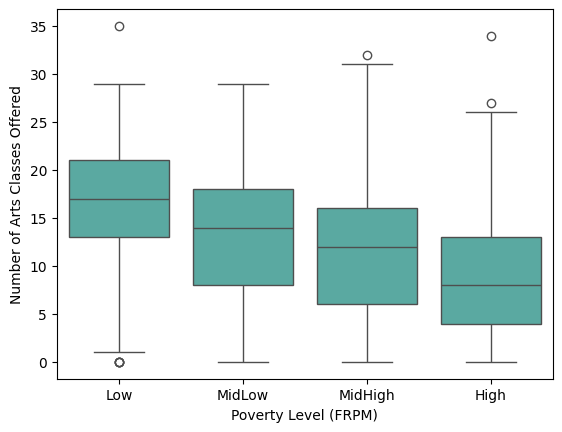

In [394]:
sns.boxplot(data=red_arts_pov, x='Poverty_Level', y='num_classes', color = '#4db6ac').set(
    xlabel = 'Poverty Level (FRPM)', ylabel = 'Number of Arts Classes Offered')


In [379]:
mean_arts_pov_red = red_arts_pov.groupby('Poverty_Level')['num_classes'].mean().reset_index()
mean_arts_pov_red

<ipython-input-379-5ed1b17686ef>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_arts_pov_red = red_arts_pov.groupby('Poverty_Level')['num_classes'].mean().reset_index()


,Poverty_Level,num_classes
0,Low,16.573333
1,MidLow,13.557971
2,MidHigh,11.221106
3,High,8.886978


In [380]:
observedVariance_red = mean_arts_pov_red['num_classes'].var()
observedVariance_red

10.795506782457961

In [395]:
frpm_arts_pov.head()

,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes,Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12),Poverty_Level
0,2018,01612340130054,0161234,Newark Unified,Newark Memorial High,22.0,39.2,45.5,MidLow
1,2018,04100410134213,0410041,Butte County Office of Education,Come Back Butte Charter,2.0,80.3,90.2,High
2,2018,01612750136515,0161275,Piedmont City Unified,Piedmont High,12.0,1.3,1.3,Low
3,2018,16639820136234,1663982,Lemoore Union High,Lemoore Online College Preparatory High,1.0,30.8,42.3,MidLow
4,2018,16639820110205,1663982,Lemoore Union High,Lemoore Middle College High,2.0,23.7,27.5,MidLow


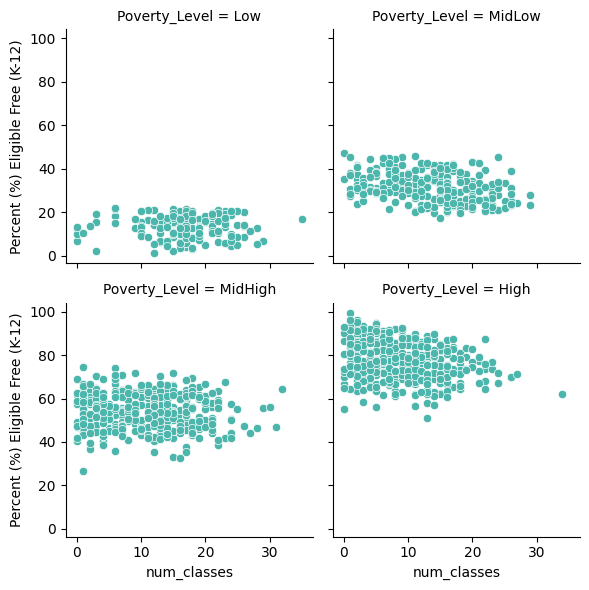

In [398]:
g= sns.FacetGrid(frpm_arts_pov, col='Poverty_Level', col_wrap=2)
g.map(sns.scatterplot, "num_classes", "Percent (%) Eligible Free (K-12)", color = '#4db6ac')

### 2018 Data (Most recent)

In [80]:
public_hs_arts_18 = public_hs_arts[public_hs_arts['year'] == 2018]

In [81]:
public_hs_arts_18.head()

,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes
7401,2018,01612340130054,0161234,Newark Unified,Newark Memorial High,22.0
7402,2018,04100410134213,0410041,Butte County Office of Education,Come Back Butte Charter,2.0
7403,2018,01612750136515,0161275,Piedmont City Unified,Piedmont High,12.0
7404,2018,16639820136234,1663982,Lemoore Union High,Lemoore Online College Preparatory High,1.0
7405,2018,16639820110205,1663982,Lemoore Union High,Lemoore Middle College High,2.0


In [82]:
public_hs_arts_18.shape

(1251, 6)

In [83]:
public_hs_arts_18['num_classes'].mean()

11.530775379696243

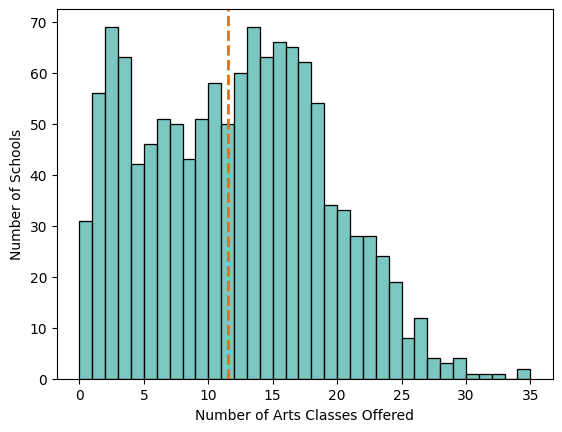

In [84]:
sns.histplot(data=public_hs_arts_18, x='num_classes', binwidth=1, color = '#4db6ac').set(
  xlabel = 'Number of Arts Classes Offered', ylabel = 'Number of Schools')
mean_value = public_hs_arts_18['num_classes'].mean()  # Calculate the mean or any other value
plt.axvline(x=mean_value, color='#ef6c02', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')


In [85]:
district_arts1819 = public_hs_arts_18.groupby(['DistrictCode'])['num_classes'].mean().reset_index()
district_arts1819.head()

,DistrictCode,num_classes
0,0161119,18.0
1,0161127,11.0
2,0161143,29.0
3,0161150,21.0
4,0161168,5.0


In [86]:
districtarts_join_18 = pd.merge(ca_districts_shp, district_arts1819, left_on='CDCode', right_on='DistrictCode', how='left')
districtarts_join_18 = districtarts_join_18[['Year', 'FedID', 'CDCode', 'DistrictNa', 'num_classes', 'geometry']]
districtarts_join_18.head()

,Year,FedID,CDCode,DistrictNa,num_classes,geometry
0,2018-19,0601770,0161119,Alameda Unified,18.0,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
1,2018-19,0601860,0161127,Albany City Unified,11.0,"POLYGON ((-13612889.056 4565138.930, -13612899..."
2,2018-19,0604740,0161143,Berkeley Unified,29.0,"POLYGON ((-13609481.010 4565073.896, -13609482..."
3,2018-19,0607800,0161150,Castro Valley Unified,21.0,"MULTIPOLYGON (((-13581537.591 4528171.452, -13..."
4,2018-19,0612630,0161168,Emery Unified,5.0,"POLYGON ((-13614035.309 4555653.898, -13613927..."


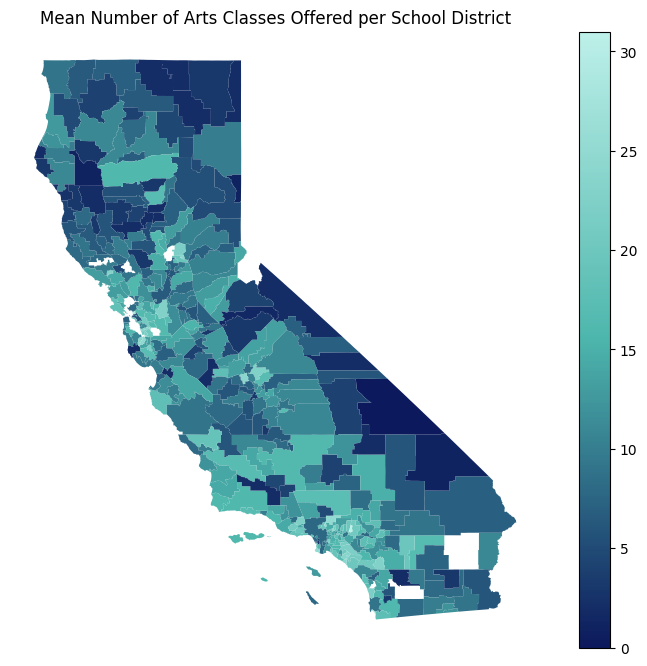

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))
districtarts_join_18.plot(column='num_classes', cmap=custom_col, legend=True, ax=ax)

# Customize the plot
ax.set_title('Mean Number of Arts Classes Offered per School District')
ax.set_axis_off()

[Text(0.5, 0, 'Mean Number of Arts Classes Offered'),
 Text(0, 0.5, 'Number of Districts')]

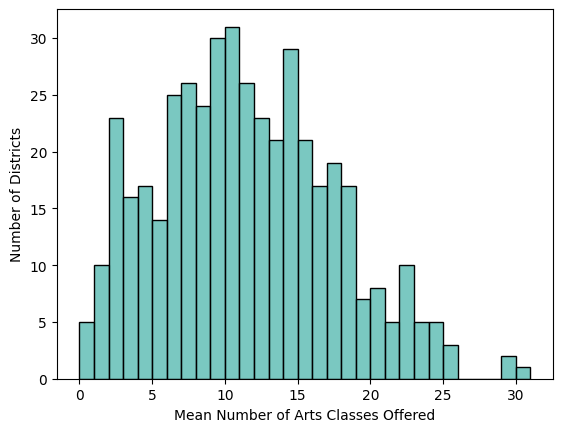

In [88]:
sns.histplot(data = district_arts1819, x = 'num_classes', binwidth = 1, color = '#4db6ac').set(
    xlabel = "Mean Number of Arts Classes Offered", ylabel = "Number of Districts")


#### By Arts Category

In [89]:
schools_with_arts18 = schools_with_arts[schools_with_arts['year'] == 2018]

In [90]:
num_arts_classes_category = schools_with_arts18.groupby(['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName', 'AssignmentSubject']).agg(
    num_classes = pd.NamedAgg(column = 'CourseCode', aggfunc = 'nunique')).reset_index()

num_arts_classes_category.head()

,CDS_CODE,DistrictCode,DistrictName,SchoolName,AssignmentSubject,num_classes
0,01611190130229,0161119,Alameda Unified,Alameda High,Art,4
1,01611190130229,0161119,Alameda Unified,Alameda High,"Arts, Media, and Entertainment",5
2,01611190130229,0161119,Alameda Unified,Alameda High,Dance,1
3,01611190130229,0161119,Alameda Unified,Alameda High,Drama/Theater,3
4,01611190130229,0161119,Alameda Unified,Alameda High,Music,5


In [91]:
#arts schools
num_arts_classes_pivot = num_arts_classes_category.pivot(
    index=['CDS_CODE', 'DistrictName', 'SchoolName'],
    columns='AssignmentSubject',
    values='num_classes').reset_index()

# num_arts_classes_pivot.columns.name = None  # Remove the aggregation name
# num_arts_classes_pivot.rename(columns={'Art': 'Art_Enr', 'Drama/Theater': 'Theater_Enr', 'Music': 'Music_Enr',
#                                        'Arts, Media, and Entertainment': 'ArtsMediaEnt_Enr', 'Dance': 'Dance_Enr'}, inplace=True)
num_arts_classes_pivot.fillna(0, inplace = True)

num_arts_classes_pivot.head()

AssignmentSubject,CDS_CODE,DistrictName,SchoolName,Art,"Arts, Media, and Entertainment",Dance,Drama/Theater,Music
0,01611190130229,Alameda Unified,Alameda High,4.0,5.0,1.0,3.0,5.0
1,01611270130450,Albany City Unified,Albany High,5.0,2.0,1.0,0.0,3.0
2,01611430131177,Berkeley Unified,Berkeley High,8.0,8.0,3.0,2.0,8.0
3,01611500132225,Castro Valley Unified,Castro Valley High,6.0,9.0,0.0,1.0,5.0
4,01611680132746,Emery Unified,Emery Secondary,2.0,1.0,0.0,0.0,2.0


In [92]:
# all schools
all_class_enroll_cat = pd.merge(public_hs_arts_18, num_arts_classes_pivot, how = 'left', left_on = ['CDS_CODE', 'DistrictName', 'SchoolName'],
                                right_on = ['CDS_CODE', 'DistrictName', 'SchoolName'])
all_class_enroll_cat.drop(columns = ['year','num_classes'], inplace = True)
all_class_enroll_cat.fillna(0, inplace = True)
all_class_enroll_cat.head()

,CDS_CODE,DistrictCode,DistrictName,SchoolName,Art,"Arts, Media, and Entertainment",Dance,Drama/Theater,Music
0,01612340130054,0161234,Newark Unified,Newark Memorial High,7.0,8.0,0.0,4.0,3.0
1,04100410134213,0410041,Butte County Office of Education,Come Back Butte Charter,2.0,0.0,0.0,0.0,0.0
2,01612750136515,0161275,Piedmont City Unified,Piedmont High,4.0,1.0,1.0,2.0,4.0
3,16639820136234,1663982,Lemoore Union High,Lemoore Online College Preparatory High,1.0,0.0,0.0,0.0,0.0
4,16639820110205,1663982,Lemoore Union High,Lemoore Middle College High,1.0,0.0,0.0,0.0,1.0


In [93]:
num_class_cat = all_class_enroll_cat.melt(id_vars = ['CDS_CODE',	'DistrictCode','DistrictName',	'SchoolName'],
                              var_name = "Subject",
                              value_name = "Total")

num_class_cat.head()


,CDS_CODE,DistrictCode,DistrictName,SchoolName,Subject,Total
0,01612340130054,0161234,Newark Unified,Newark Memorial High,Art,7.0
1,04100410134213,0410041,Butte County Office of Education,Come Back Butte Charter,Art,2.0
2,01612750136515,0161275,Piedmont City Unified,Piedmont High,Art,4.0
3,16639820136234,1663982,Lemoore Union High,Lemoore Online College Preparatory High,Art,1.0
4,16639820110205,1663982,Lemoore Union High,Lemoore Middle College High,Art,1.0


Text(0, 0.5, '')

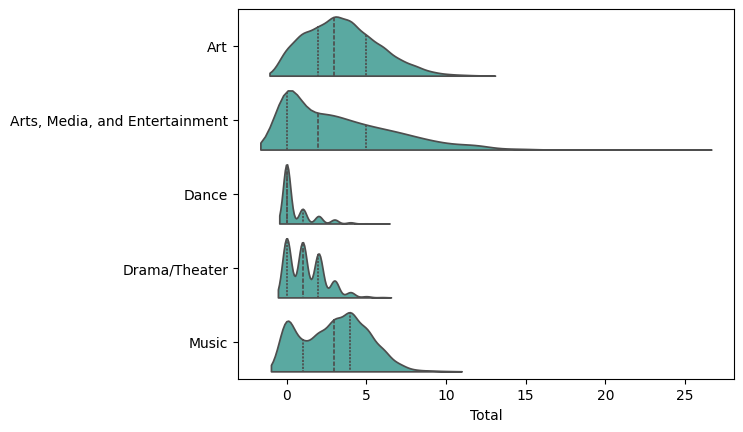

In [94]:
# filtered_data = num_class_cat[num_class_cat['Subject'] != 'Arts, Media, and Entertainment']

sns.violinplot(data=num_class_cat, x="Total", y="Subject", split = "True", inner="quart", density_norm='count', color = '#4db6ac').set_ylabel('')


In [95]:
median_values = num_class_cat.groupby('Subject')['Total'].median().reset_index()
mean_values = num_class_cat.groupby('Subject')['Total'].mean().reset_index()
median_values

,Subject,Total
0,Art,3.0
1,"Arts, Media, and Entertainment",2.0
2,Dance,0.0
3,Drama/Theater,1.0
4,Music,3.0


In [96]:
mean_values

,Subject,Total
0,Art,3.494005
1,"Arts, Media, and Entertainment",3.306155
2,Dance,0.545164
3,Drama/Theater,1.221423
4,Music,2.964029


#### Test scores

In [97]:
test_scores = pd.read_csv('/content/drive/MyDrive/MDS/Data 294P/Data and Code/test_score_hs.csv', dtype = {'CDS_CODE': 'str'})

In [98]:
test_scores.shape

(2458, 9)

In [99]:
test_scores.head()

,CDS_CODE,Test Id,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores
0,01611190130229,1,2666.3,48.48,34.85,83.33,11.87,4.80,396
1,01611190130229,2,2657.5,33.50,28.25,61.75,21.25,17.00,400
2,01611270130450,1,2659.0,50.47,30.37,80.84,8.88,10.28,214
3,01611270130450,2,2684.0,45.75,25.00,70.75,15.57,13.68,212
4,01611430131177,1,2652.1,49.66,25.62,75.28,11.69,13.03,445


In [100]:
test_scores_arts_classes = pd.merge(test_scores, public_hs_arts_18, how = 'right')

In [101]:
test_scores_arts_classes.dtypes

,0
CDS_CODE,object
Test Id,float64
Mean Scale Score,object
Percentage Standard Exceeded,object
Percentage Standard Met,object
Percentage Standard Met and Above,object
Percentage Standard Nearly Met,object
Percentage Standard Not Met,object
Students with Scores,object
year,int64


In [102]:
test_scores_arts_classes.head()

,CDS_CODE,Test Id,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,year,DistrictCode,DistrictName,SchoolName,num_classes
0,01612340130054,1.0,2598.8,24.37,36.29,60.66,18.78,20.56,394,2018,0161234,Newark Unified,Newark Memorial High,22.0
1,01612340130054,2.0,2552.7,9.41,18.07,27.48,25.19,47.33,393,2018,0161234,Newark Unified,Newark Memorial High,22.0
2,04100410134213,1.0,2531.9,6.25,18.75,25.00,50.00,25.00,16,2018,0410041,Butte County Office of Education,Come Back Butte Charter,2.0
3,04100410134213,2.0,2429.9,0.00,0.00,0.00,0.00,100.00,15,2018,0410041,Butte County Office of Education,Come Back Butte Charter,2.0
4,01612750136515,1.0,2689.5,62.35,24.12,86.47,9.41,4.12,170,2018,0161275,Piedmont City Unified,Piedmont High,12.0


In [103]:
test_scores_arts_classes.columns

Index(['CDS_CODE', 'Test Id', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'year',
       'DistrictCode', 'DistrictName', 'SchoolName', 'num_classes'],
      dtype='object')

In [104]:
score_arts = test_scores_arts_classes[['CDS_CODE', 'DistrictCode','Test Id', 'Mean Scale Score', 'num_classes']]

In [105]:
score_arts_standard = test_scores_arts_classes[['CDS_CODE', 'DistrictCode', 'Test Id',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met','num_classes']]

In [106]:
score_arts_standard=score_arts_standard.replace('*', np.nan)

columns_to_convert = ['Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met']

score_arts_standard[columns_to_convert] = score_arts_standard[columns_to_convert].apply(pd.to_numeric)


In [107]:
score_arts['Mean Scale Score'] = score_arts['Mean Scale Score'].replace('*', np.nan)

score_arts['Mean Scale Score'] = pd.to_numeric(score_arts['Mean Scale Score'])


<ipython-input-107-bfff6298272e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_arts['Mean Scale Score'] = score_arts['Mean Scale Score'].replace('*', np.nan)
<ipython-input-107-bfff6298272e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_arts['Mean Scale Score'] = pd.to_numeric(score_arts['Mean Scale Score'])


In [108]:
score_arts_district = score_arts.groupby(['DistrictCode', 'Test Id']).agg(
    mean_score = pd.NamedAgg(column = 'Mean Scale Score', aggfunc = 'mean'),
    num_classes = pd.NamedAgg(column = 'num_classes', aggfunc = 'mean')).reset_index()

In [109]:
score_arts_district.head()

,DistrictCode,Test Id,mean_score,num_classes
0,0161119,1.0,2666.3,18.0
1,0161119,2.0,2657.5,18.0
2,0161127,1.0,2659.0,11.0
3,0161127,2.0,2684.0,11.0
4,0161143,1.0,2652.1,29.0


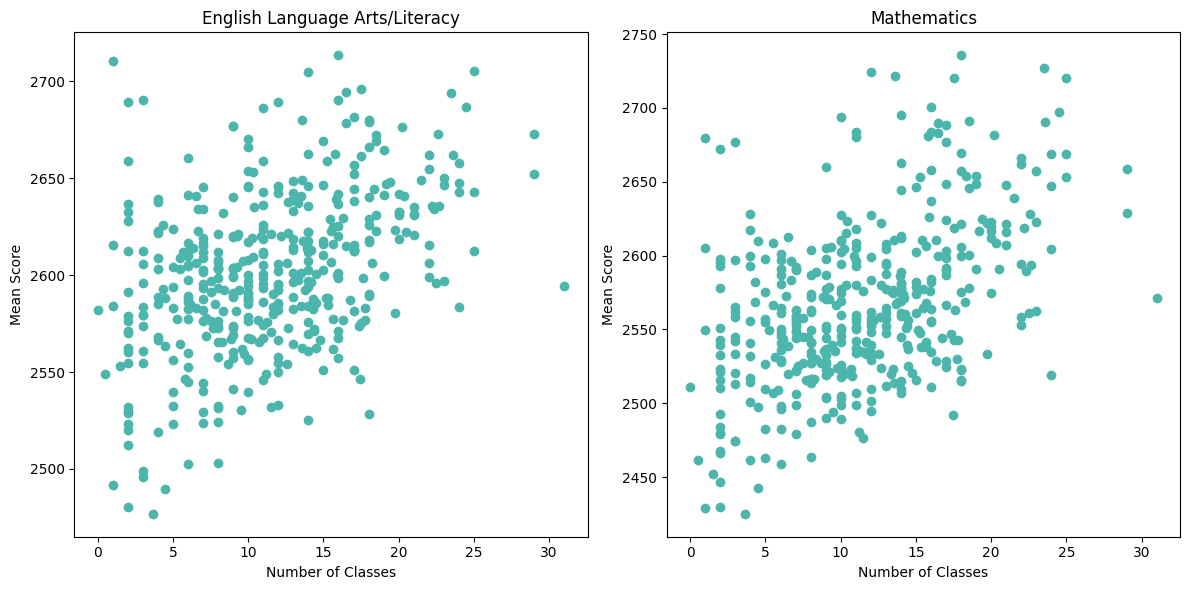

In [110]:
# Get unique Test Ids
test_ids = score_arts_district['Test Id'].unique()

# Create subplots: one for each Test Id
fig, axes = plt.subplots(nrows=1, ncols=len(test_ids), figsize=(12, 6))

for i, test_id in enumerate(test_ids):
    # Filter data for the current Test Id
    test_data = score_arts_district[score_arts_district['Test Id'] == test_id]

    # Plot mean_score vs num_classes
    axes[i].scatter(test_data['num_classes'], test_data['mean_score'], color='#4db6ac')

    # Set plot title and labels
    axes[i].set_xlabel('Number of Classes')
    axes[i].set_ylabel('Mean Score')

# Adjust layout
axes[0].set_title('English Language Arts/Literacy')
axes[1].set_title('Mathematics')
plt.tight_layout()
plt.show()


In [111]:
score_arts_district_1 = score_arts_district[score_arts_district['Test Id'] == 1]
score_arts_district_2 = score_arts_district[score_arts_district['Test Id'] == 2]

In [112]:
score_arts_district_1.corr()

,DistrictCode,Test Id,mean_score,num_classes
DistrictCode,1.000000,NaN,-0.024237,-0.025012
Test Id,NaN,NaN,NaN,NaN
mean_score,-0.024237,NaN,1.000000,0.427840
num_classes,-0.025012,NaN,0.427840,1.000000


In [113]:
score_arts_district_2.corr()

,DistrictCode,Test Id,mean_score,num_classes
DistrictCode,1.000000,NaN,-0.019894,-0.025751
Test Id,NaN,NaN,NaN,NaN
mean_score,-0.019894,NaN,1.000000,0.485724
num_classes,-0.025751,NaN,0.485724,1.000000


In [114]:
score_arts_standard_dist = score_arts_standard.groupby(['DistrictCode', 'Test Id']).agg(
    exceed = pd.NamedAgg(column = 'Percentage Standard Exceeded', aggfunc = 'mean'),
    met = pd.NamedAgg(column = 'Percentage Standard Met', aggfunc = 'mean'),
    met_above = pd.NamedAgg(column = 'Percentage Standard Met and Above', aggfunc = 'mean'),
    nearly_met = pd.NamedAgg(column = 'Percentage Standard Nearly Met', aggfunc = 'mean'),
    not_met = pd.NamedAgg(column = 'Percentage Standard Not Met', aggfunc = 'mean'),
    num_classes = pd.NamedAgg(column = 'num_classes', aggfunc = 'mean')).reset_index()

score_arts_standard_dist.head()

,DistrictCode,Test Id,exceed,met,met_above,nearly_met,not_met,num_classes
0,0161119,1.0,48.48,34.85,83.33,11.87,4.80,18.0
1,0161119,2.0,33.50,28.25,61.75,21.25,17.00,18.0
2,0161127,1.0,50.47,30.37,80.84,8.88,10.28,11.0
3,0161127,2.0,45.75,25.00,70.75,15.57,13.68,11.0
4,0161143,1.0,49.66,25.62,75.28,11.69,13.03,29.0


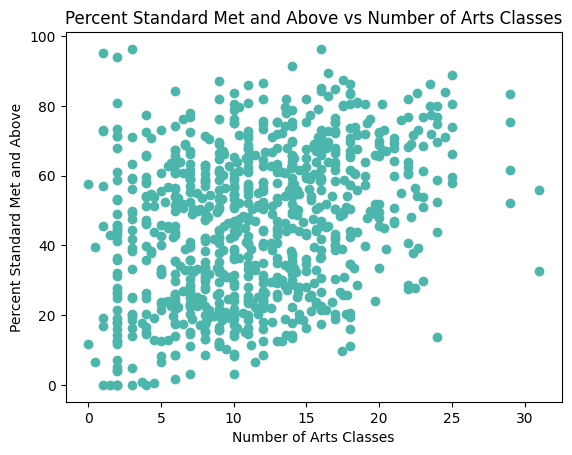

In [115]:
plt.scatter(score_arts_standard_dist['num_classes'], score_arts_standard_dist['met_above'], color = '#4db6ac')
plt.title('Percent Standard Met and Above vs Number of Arts Classes')
plt.xlabel('Number of Arts Classes')
plt.ylabel('Percent Standard Met and Above')
plt.show()

In [116]:
score_arts_standard_dist.corr()

,DistrictCode,Test Id,exceed,met,met_above,nearly_met,not_met,num_classes
DistrictCode,1.000000,0.000238,-0.029466,0.011620,-0.015255,0.020390,0.010004,-0.025380
Test Id,0.000238,1.000000,-0.485144,-0.683897,-0.639161,0.145209,0.660958,0.002062
exceed,-0.029466,-0.485144,1.000000,0.527332,0.926382,-0.590217,-0.828488,0.406744
met,0.011620,-0.683897,0.527332,1.000000,0.808480,-0.124875,-0.856103,0.122783
met_above,-0.015255,-0.639161,0.926382,0.808480,1.000000,-0.464167,-0.953300,0.336157
nearly_met,0.020390,0.145209,-0.590217,-0.124875,-0.464167,1.000000,0.174973,-0.178199
not_met,0.010004,0.660958,-0.828488,-0.856103,-0.953300,0.174973,1.000000,-0.312903
num_classes,-0.025380,0.002062,0.406744,0.122783,0.336157,-0.178199,-0.312903,1.000000


In [117]:
score_arts_standard.head()

,CDS_CODE,DistrictCode,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,num_classes
0,01612340130054,0161234,1.0,24.37,36.29,60.66,18.78,20.56,22.0
1,01612340130054,0161234,2.0,9.41,18.07,27.48,25.19,47.33,22.0
2,04100410134213,0410041,1.0,6.25,18.75,25.00,50.00,25.00,2.0
3,04100410134213,0410041,2.0,0.00,0.00,0.00,0.00,100.00,2.0
4,01612750136515,0161275,1.0,62.35,24.12,86.47,9.41,4.12,12.0


In [408]:
score_arts_district_1.head()

,DistrictCode,Test Id,mean_score,num_classes
0,0161119,1.0,2666.3,18.0
2,0161127,1.0,2659.0,11.0
4,0161143,1.0,2652.1,29.0
6,0161150,1.0,2631.5,21.0
8,0161168,1.0,2556.3,5.0


In [416]:
top_25_dist = score_arts_district_2['num_classes'].quantile(.75)
bottom_25_dist = score_arts_district_2['num_classes'].quantile(.25)

In [417]:
score_arts_district_1_top = score_arts_district_2[score_arts_district_2['num_classes'] >= top_25_dist]
score_arts_district_1_bottom = score_arts_district_2[score_arts_district_2['num_classes'] <= bottom_25_dist]

In [418]:
print(score_arts_district_1_top['mean_score'].mean(), score_arts_district_1_bottom['mean_score'].mean())

2607.645555962226 2540.4026472796204


#### Ethnicity

In [272]:
public_hs_18_codes = public_hs

In [279]:
schools_reported_courses.shape

(11293944, 20)

In [280]:
schools_eth = schools_reported_courses[(schools_reported_courses['CDS_CODE'].isin(public_hs_18_codes)) & (schools_reported_courses['year'] == 2018)]
schools_eth.head()

,DistrictCode,SchoolCode,DistrictName,SchoolName,CourseCode,EnrollNoEthRptd,EnrollAmInd,EnrollAsian,EnrollPacIsl,EnrollFilipino,EnrollHispanic,EnrollAfrAm,EnrollWhite,EnrollTwoOrMore,EnrollTotal,year,CDS_CODE,AssignmentCode,AssignmentName,AssignmentSubject
9641732,0161234,0130054,Newark Unified,Newark Memorial High,2204,0,0,1,0,0,0,0,0,0,1,2018,01612340130054,2204,French (first and second year),Foreign Languages
9641733,0410041,0134213,Butte County Office of Education,Come Back Butte Charter,1000,0,1,0,0,0,0,0,0,0,1,2018,04100410134213,1000,Self-Contained Class,Self-Contained Class
9641734,0161275,0136515,Piedmont City Unified,Piedmont High,2709,0,0,3,0,0,1,0,8,3,15,2018,01612750136515,2709,United States history,History/Social Science
9641735,0161275,0136515,Piedmont City Unified,Piedmont High,2603,0,0,0,0,0,1,0,0,0,1,2018,01612750136515,2603,Biology,Science
9641736,0161275,0136515,Piedmont City Unified,Piedmont High,2614,0,0,0,0,0,0,0,2,0,2,2018,01612750136515,2614,Advanced physics,Science


In [275]:
schools_eth.shape

(1634371, 20)

In [281]:
schools_tot_enr = schools_eth.groupby(['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']).agg(
    total_EnrollNoEthRptd = pd.NamedAgg(column = 'EnrollNoEthRptd', aggfunc='sum'),
    total_EnrollAmInd = pd.NamedAgg(column = 'EnrollAmInd', aggfunc='sum'),
    total_EnrollAsian = pd.NamedAgg(column = 'EnrollAsian', aggfunc='sum'),
    total_EnrollPacIsl = pd.NamedAgg(column = 'EnrollPacIsl', aggfunc='sum'),
    total_EnrollFilipino = pd.NamedAgg(column = 'EnrollFilipino', aggfunc='sum'),
    total_EnrollHispanic = pd.NamedAgg(column = 'EnrollHispanic', aggfunc='sum'),
    total_EnrollAfrAm = pd.NamedAgg(column = 'EnrollAfrAm', aggfunc='sum'),
    total_EnrollWhite = pd.NamedAgg(column = 'EnrollWhite', aggfunc='sum'),
    total_EnrollTwoOrMore = pd.NamedAgg(column = 'EnrollTwoOrMore', aggfunc='sum'),
    total_EnrollTotal = pd.NamedAgg(column = 'EnrollTotal', aggfunc='sum'),
    ).reset_index()
schools_tot_enr.head(20)
#total class enrollments per ethnicity

,CDS_CODE,DistrictCode,DistrictName,SchoolName,total_EnrollNoEthRptd,total_EnrollAmInd,total_EnrollAsian,total_EnrollPacIsl,total_EnrollFilipino,total_EnrollHispanic,total_EnrollAfrAm,total_EnrollWhite,total_EnrollTwoOrMore,total_EnrollTotal
0,01611190130229,0161119,Alameda Unified,Alameda High,53,11,4100,60,654,1341,522,3239,659,10639
1,01611270130450,0161127,Albany City Unified,Albany High,121,9,2632,28,114,1403,247,3070,943,8567
2,01611430131177,0161143,Berkeley Unified,Berkeley High,6,41,1525,53,143,4301,2590,8176,2535,19370
3,01611500132225,0161150,Castro Valley Unified,Castro Valley High,175,29,4852,88,778,4019,998,4744,1592,17275
4,01611680132746,0161168,Emery Unified,Emery Secondary,0,0,183,7,5,339,608,106,96,1344
5,01611760130062,0161176,Fremont Unified,American High,0,28,9112,71,1393,1172,444,1919,518,14657
6,01611760134270,0161176,Fremont Unified,Irvington High,0,45,11558,57,844,1443,210,1802,342,16301
7,01611760134452,0161176,Fremont Unified,John F. Kennedy High,12,15,1704,100,763,2271,304,1283,183,6635
8,01611760135244,0161176,Fremont Unified,Mission San Jose High,0,13,11233,11,204,192,31,584,137,12405
9,01611760138693,0161176,Fremont Unified,Washington High,18,25,4623,85,893,2632,374,2243,475,11368


In [282]:
schools_tot_enr.shape

(1238, 14)

In [283]:
schools_with_arts18['CDS_CODE'].unique().shape

(1220,)

In [284]:
num_enrolled_arts_eth = schools_with_arts18.groupby(['CDS_CODE', 'DistrictName', 'SchoolName']).agg(
    arts_EnrollNoEthRptd = pd.NamedAgg(column = 'EnrollNoEthRptd', aggfunc='sum'),
    arts_EnrollAmInd = pd.NamedAgg(column = 'EnrollAmInd', aggfunc='sum'),
    arts_EnrollAsian = pd.NamedAgg(column = 'EnrollAsian', aggfunc='sum'),
    arts_EnrollPacIsl = pd.NamedAgg(column = 'EnrollPacIsl', aggfunc='sum'),
    arts_EnrollFilipino = pd.NamedAgg(column = 'EnrollFilipino', aggfunc='sum'),
    arts_EnrollHispanic = pd.NamedAgg(column = 'EnrollHispanic', aggfunc='sum'),
    arts_EnrollAfrAm = pd.NamedAgg(column = 'EnrollAfrAm', aggfunc='sum'),
    arts_EnrollWhite = pd.NamedAgg(column = 'EnrollWhite', aggfunc='sum'),
    arts_EnrollTwoOrMore = pd.NamedAgg(column = 'EnrollTwoOrMore', aggfunc='sum'),
    arts_EnrollTotal = pd.NamedAgg(column = 'EnrollTotal', aggfunc='sum'),
    ).reset_index()
num_enrolled_arts_eth.shape

(1220, 13)

In [285]:
arts_total_enroll_eth = pd.merge(schools_tot_enr, num_enrolled_arts_eth, on = ['CDS_CODE', 'DistrictName', 'SchoolName'], how = 'left')
arts_total_enroll_eth.head(20)

,CDS_CODE,DistrictCode,DistrictName,SchoolName,total_EnrollNoEthRptd,total_EnrollAmInd,total_EnrollAsian,total_EnrollPacIsl,total_EnrollFilipino,total_EnrollHispanic,...,arts_EnrollNoEthRptd,arts_EnrollAmInd,arts_EnrollAsian,arts_EnrollPacIsl,arts_EnrollFilipino,arts_EnrollHispanic,arts_EnrollAfrAm,arts_EnrollWhite,arts_EnrollTwoOrMore,arts_EnrollTotal
0,01611190130229,0161119,Alameda Unified,Alameda High,53,11,4100,60,654,1341,...,6.0,1.0,269.0,6.0,45.0,94.0,36.0,262.0,59.0,778.0
1,01611270130450,0161127,Albany City Unified,Albany High,121,9,2632,28,114,1403,...,11.0,1.0,246.0,3.0,9.0,125.0,22.0,296.0,91.0,804.0
2,01611430131177,0161143,Berkeley Unified,Berkeley High,6,41,1525,53,143,4301,...,1.0,3.0,120.0,2.0,15.0,439.0,282.0,887.0,272.0,2021.0
3,01611500132225,0161150,Castro Valley Unified,Castro Valley High,175,29,4852,88,778,4019,...,21.0,1.0,449.0,5.0,80.0,375.0,101.0,482.0,148.0,1662.0
4,01611680132746,0161168,Emery Unified,Emery Secondary,0,0,183,7,5,339,...,0.0,0.0,20.0,1.0,0.0,54.0,77.0,11.0,12.0,175.0
5,01611760130062,0161176,Fremont Unified,American High,0,28,9112,71,1393,1172,...,0.0,0.0,496.0,4.0,85.0,89.0,30.0,143.0,32.0,879.0
6,01611760134270,0161176,Fremont Unified,Irvington High,0,45,11558,57,844,1443,...,0.0,4.0,1105.0,8.0,66.0,116.0,13.0,168.0,36.0,1516.0
7,01611760134452,0161176,Fremont Unified,John F. Kennedy High,12,15,1704,100,763,2271,...,1.0,1.0,141.0,6.0,77.0,218.0,28.0,128.0,13.0,613.0
8,01611760135244,0161176,Fremont Unified,Mission San Jose High,0,13,11233,11,204,192,...,0.0,0.0,900.0,0.0,21.0,12.0,3.0,48.0,10.0,994.0
9,01611760138693,0161176,Fremont Unified,Washington High,18,25,4623,85,893,2632,...,2.0,0.0,239.0,5.0,74.0,267.0,32.0,202.0,31.0,852.0


In [286]:
arts_total_enroll_eth.shape

(1238, 24)

In [287]:
ethnicity_columns = ['EnrollNoEthRptd',
       'EnrollAmInd', 'EnrollAsian', 'EnrollPacIsl',
       'EnrollFilipino', 'EnrollHispanic', 'EnrollAfrAm',
       'EnrollWhite', 'EnrollTwoOrMore', 'EnrollTotal']

arts_eth_prop = arts_total_enroll_eth[['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']].copy()

for column in ethnicity_columns:
    arts_column = f"arts_{column}"
    total_column = f"total_{column}"
    proportion_column = f"Proportion_{column}"

    # Calculate proportion and handle division by zero
    arts_eth_prop.loc[:, proportion_column] = (
        arts_total_enroll_eth[arts_column] /
        arts_total_enroll_eth[total_column].replace(0, np.nan)
    )

In [288]:
arts_eth_prop.head()

,CDS_CODE,DistrictCode,DistrictName,SchoolName,Proportion_EnrollNoEthRptd,Proportion_EnrollAmInd,Proportion_EnrollAsian,Proportion_EnrollPacIsl,Proportion_EnrollFilipino,Proportion_EnrollHispanic,Proportion_EnrollAfrAm,Proportion_EnrollWhite,Proportion_EnrollTwoOrMore,Proportion_EnrollTotal
0,01611190130229,0161119,Alameda Unified,Alameda High,0.113208,0.090909,0.065610,0.100000,0.068807,0.070097,0.068966,0.080889,0.089530,0.073127
1,01611270130450,0161127,Albany City Unified,Albany High,0.090909,0.111111,0.093465,0.107143,0.078947,0.089095,0.089069,0.096417,0.096501,0.093848
2,01611430131177,0161143,Berkeley Unified,Berkeley High,0.166667,0.073171,0.078689,0.037736,0.104895,0.102069,0.108880,0.108488,0.107298,0.104337
3,01611500132225,0161150,Castro Valley Unified,Castro Valley High,0.120000,0.034483,0.092539,0.056818,0.102828,0.093307,0.101202,0.101602,0.092965,0.096208
4,01611680132746,0161168,Emery Unified,Emery Secondary,NaN,NaN,0.109290,0.142857,0.000000,0.159292,0.126645,0.103774,0.125000,0.130208


In [289]:
prop_eth_tot_num_classes = pd.merge(public_hs_arts_18, arts_eth_prop, how = 'inner', on = ['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName'])

In [290]:
prop_eth_tot_num_classes.shape

(1238, 16)

In [291]:
prop_eth_tot_num_classes.head()

,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes,Proportion_EnrollNoEthRptd,Proportion_EnrollAmInd,Proportion_EnrollAsian,Proportion_EnrollPacIsl,Proportion_EnrollFilipino,Proportion_EnrollHispanic,Proportion_EnrollAfrAm,Proportion_EnrollWhite,Proportion_EnrollTwoOrMore,Proportion_EnrollTotal
0,2018,01612340130054,0161234,Newark Unified,Newark Memorial High,22.0,0.085714,0.083333,0.091860,0.095238,0.096189,0.102559,0.109091,0.113395,0.117021,0.102564
1,2018,04100410134213,0410041,Butte County Office of Education,Come Back Butte Charter,2.0,NaN,0.000000,0.000000,0.000000,NaN,0.054545,0.000000,0.008772,0.000000,0.017544
2,2018,01612750136515,0161275,Piedmont City Unified,Piedmont High,12.0,NaN,NaN,0.058047,NaN,0.071429,0.097015,0.103896,0.092348,0.086124,0.087341
3,2018,16639820136234,1663982,Lemoore Union High,Lemoore Online College Preparatory High,1.0,NaN,NaN,NaN,NaN,0.125000,0.044643,0.166667,0.045455,0.000000,0.050847
4,2018,16639820110205,1663982,Lemoore Union High,Lemoore Middle College High,2.0,NaN,0.000000,0.028986,NaN,0.000000,0.021978,0.042254,0.024831,0.000000,0.022206


In [292]:
eth_map = {
    'Proportion_EnrollNoEthRptd': 'No Ethnicity Reported',
    'Proportion_EnrollAmInd': 'American Indian',
    'Proportion_EnrollAsian': 'Asian',
    'Proportion_EnrollPacIsl': 'Pacific Islander',
    'Proportion_EnrollFilipino': 'Filipino',
    'Proportion_EnrollHispanic': 'Hispanic or Latino',
    'Proportion_EnrollAfrAm': 'African American',
    'Proportion_EnrollWhite': 'White',
    'Proportion_EnrollTwoOrMore': 'Two or More'
}


In [293]:
prop_eth_tot_num_classes = prop_eth_tot_num_classes.melt(id_vars = ['CDS_CODE','DistrictCode', 'DistrictName', 'SchoolName', 'num_classes'],
                              var_name = "Ethnicity",
                              value_name = 'Proportion')

prop_eth_tot_num_classes = prop_eth_tot_num_classes.sort_values(by = ['CDS_CODE', 'Ethnicity']).reset_index(drop=True)

prop_eth_tot_num_classes['Ethnicity'] = prop_eth_tot_num_classes['Ethnicity'].map(eth_map)

In [294]:
prop_eth_tot_num_classes.head()

,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes,Ethnicity,Proportion
0,01611190130229,0161119,Alameda Unified,Alameda High,18.0,African American,0.068966
1,01611190130229,0161119,Alameda Unified,Alameda High,18.0,American Indian,0.090909
2,01611190130229,0161119,Alameda Unified,Alameda High,18.0,Asian,0.065610
3,01611190130229,0161119,Alameda Unified,Alameda High,18.0,Filipino,0.068807
4,01611190130229,0161119,Alameda Unified,Alameda High,18.0,Hispanic or Latino,0.070097


In [295]:
prop_eth_tot_num_classes_dist = prop_eth_tot_num_classes.groupby(['DistrictCode', 'Ethnicity']).agg({'num_classes': 'mean','Proportion' : 'mean'}).reset_index()
prop_eth_tot_num_classes_dist.head()

,DistrictCode,Ethnicity,num_classes,Proportion
0,0161119,African American,18.0,0.068966
1,0161119,American Indian,18.0,0.090909
2,0161119,Asian,18.0,0.065610
3,0161119,Filipino,18.0,0.068807
4,0161119,Hispanic or Latino,18.0,0.070097


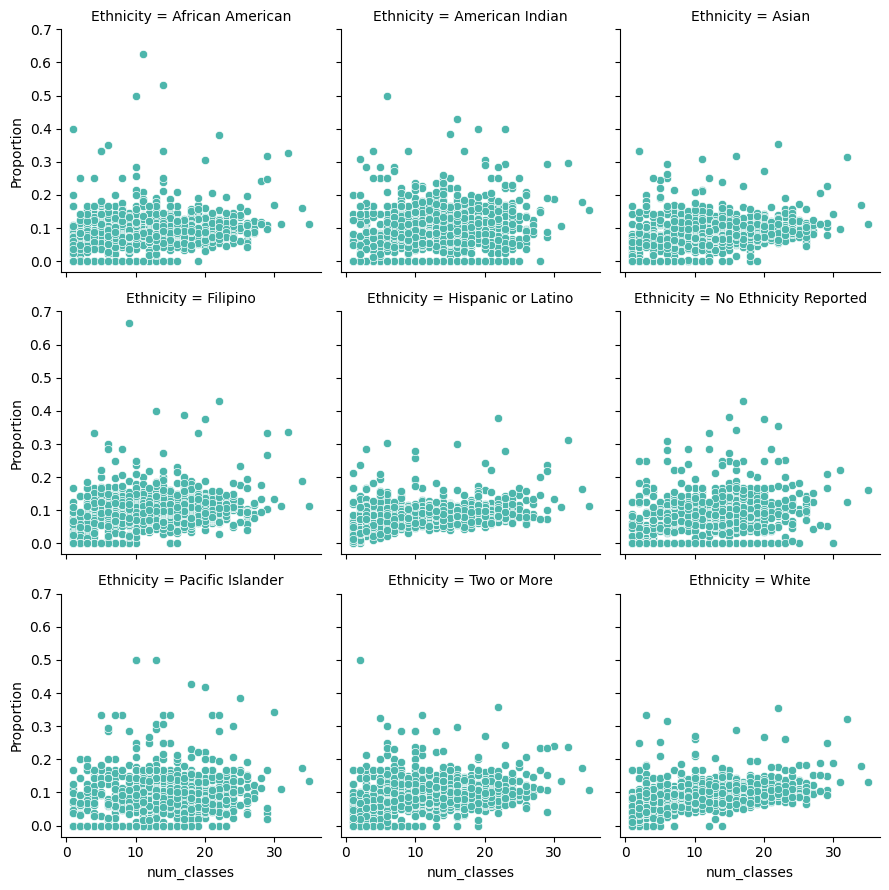

In [296]:
g= sns.FacetGrid(prop_eth_tot_num_classes, col='Ethnicity', col_wrap=3)
g.map(sns.scatterplot, "num_classes", "Proportion", color = '#4db6ac')

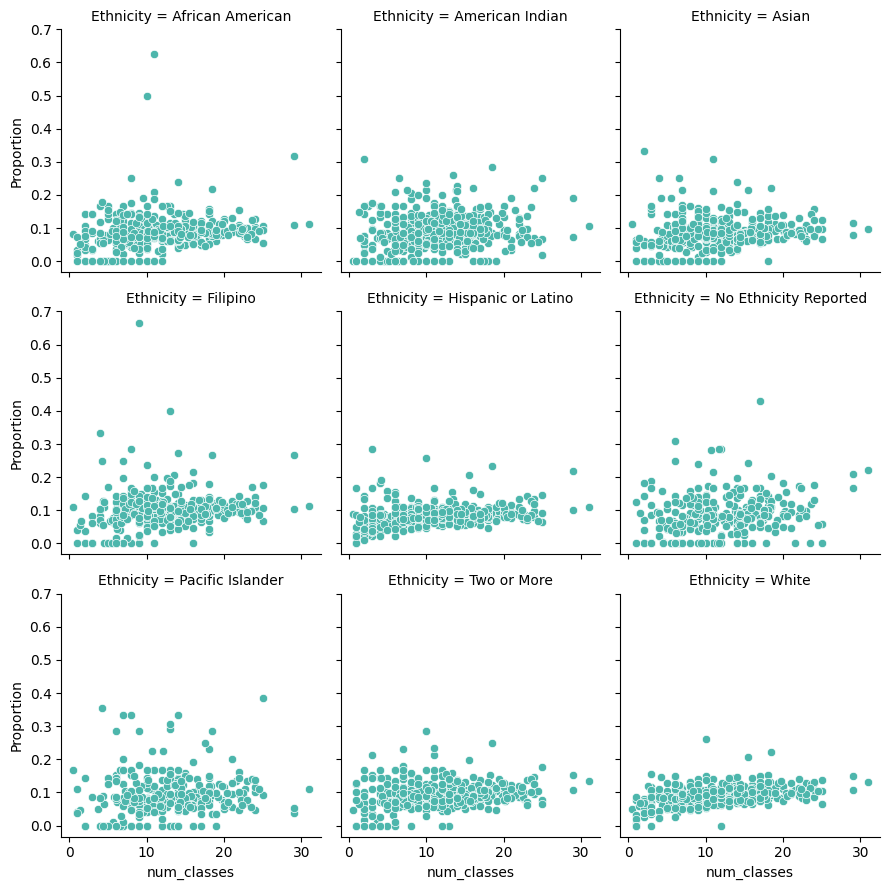

In [297]:
g= sns.FacetGrid(prop_eth_tot_num_classes_dist, col='Ethnicity', col_wrap=3)
g.map(sns.scatterplot, "num_classes", "Proportion", color = '#4db6ac')

In [250]:
arts_eth_prop_melt = arts_eth_prop.head().melt(id_vars = ['CDS_CODE',	'DistrictCode','DistrictName','SchoolName'],
                              var_name = "Ethnicity",
                              value_name = "Proportion")
arts_eth_prop_melt = arts_eth_prop_melt.sort_values(by=['CDS_CODE', 'Ethnicity']).reset_index(drop=True)

arts_eth_prop_melt['Ethnicity'] = arts_eth_prop_melt['Ethnicity'].map(eth_map)
arts_eth_prop_melt.head(10)

,CDS_CODE,DistrictCode,DistrictName,SchoolName,Ethnicity,Proportion
0,01611190130229,0161119,Alameda Unified,Alameda High,African American,0.068966
1,01611190130229,0161119,Alameda Unified,Alameda High,American Indian,0.090909
2,01611190130229,0161119,Alameda Unified,Alameda High,Asian,0.065610
3,01611190130229,0161119,Alameda Unified,Alameda High,Filipino,0.068807
4,01611190130229,0161119,Alameda Unified,Alameda High,Hispanic or Latino,0.070097
5,01611190130229,0161119,Alameda Unified,Alameda High,No Ethnicity Reported,0.113208
6,01611190130229,0161119,Alameda Unified,Alameda High,Pacific Islander,0.100000
7,01611190130229,0161119,Alameda Unified,Alameda High,NaN,0.073127
8,01611190130229,0161119,Alameda Unified,Alameda High,Two or More,0.089530
9,01611190130229,0161119,Alameda Unified,Alameda High,White,0.080889


<Axes: xlabel='Proportion', ylabel='Ethnicity'>

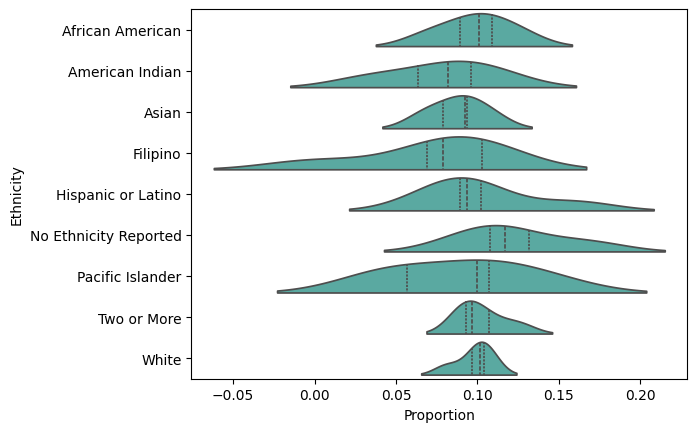

In [141]:
sns.violinplot(data=arts_eth_prop_melt, x="Proportion", y="Ethnicity", split=True, density_norm = 'count',  inner="quart", color = '#4db6ac')

In [142]:
arts_eth_prop_melt[arts_eth_prop_melt['Proportion'] <0] #there's nothing below 0... why does the histogram look like that

,CDS_CODE,DistrictCode,DistrictName,SchoolName,Ethnicity,Proportion


<Axes: xlabel='Proportion', ylabel='Ethnicity'>

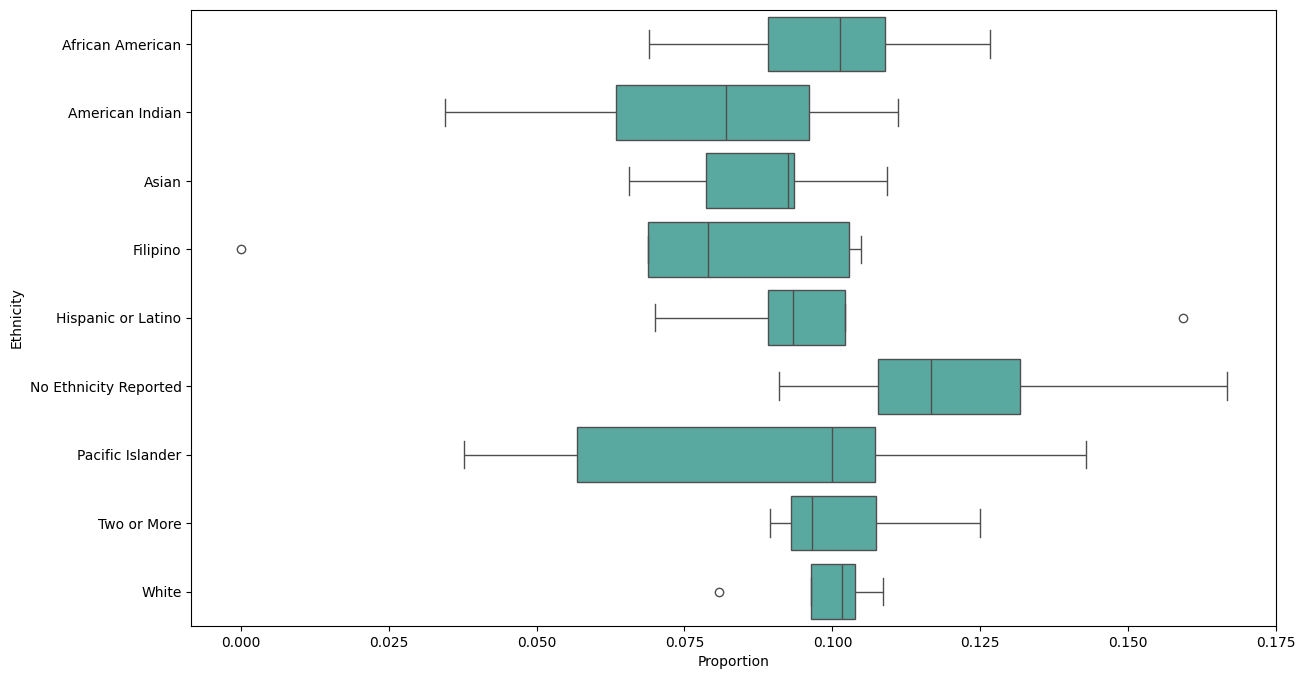

In [143]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=arts_eth_prop_melt, x="Proportion", y="Ethnicity", color = '#4db6ac')

Ethnicities in schools with highest and lowest numbers of arts classes

In [215]:
most_arts18 = public_hs_arts_18.nlargest(20, 'num_classes')['CDS_CODE']
least_arts18 = public_hs_arts_18.nsmallest(20, 'num_classes')['CDS_CODE']


In [217]:
public_hs_arts_18.nlargest(20, 'num_classes')

,year,CDS_CODE,DistrictCode,DistrictName,SchoolName,num_classes
7792,2018,30665483032943,3066548,Huntington Beach Union High,Huntington Beach High,35.0
8401,2018,37684113731064,3768411,Sweetwater Union High,Chula Vista Senior High,34.0
8512,2018,19647330119727,1964733,Los Angeles Unified,Ramon C. Cortines School of Visual and Perform...,32.0
8160,2018,36750693637584,3675069,Upland Unified,Upland High,31.0
8519,2018,19647331933852,1964733,Los Angeles Unified,Alexander Hamilton Senior High,30.0
7411,2018,01611430131177,0161143,Berkeley Unified,Berkeley High,29.0
8215,2018,36750440116707,3675044,Hesperia Unified,Encore Jr./Sr. High School for the Performing ...,29.0
8333,2018,37680313731478,3768031,Coronado Unified,Coronado High,29.0
8573,2018,19647331995836,1964733,Los Angeles Unified,Palisades Charter High,29.0
7749,2018,43696094334728,4369609,Mountain View-Los Altos Union High,Mountain View High,28.0


In [151]:
arts_eth_most18 = arts_eth_prop_melt[arts_eth_prop_melt['CDS_CODE'].isin(most_arts18)]
arts_eth_least18 = arts_eth_prop_melt[arts_eth_prop_melt['CDS_CODE'].isin(least_arts18)]

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

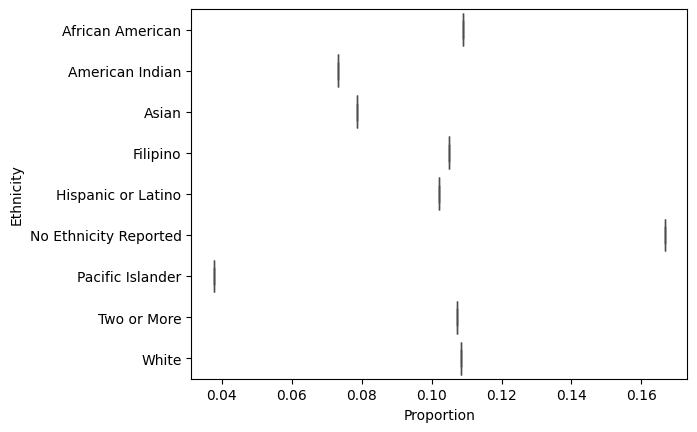

In [152]:
sns.boxplot(data=arts_eth_most18, x="Proportion", y="Ethnicity", color = '#4db6ac')

#### School Enrollment

In [153]:
# Read in total school enrollment data
# Has only public school data
enrollment_1819 = pd.read_csv('/content/drive/My Drive/MDS/Data 294P/Data and Code/enr201719-v2.txt', delimiter='\t',
                              dtype= {'CDS_CODE': str})
enrollment_1819 = enrollment_1819[(enrollment_1819['ACADEMIC_YEAR'] == '2018-19') & (enrollment_1819['ENR_TYPE'] == 'C')]


In [163]:
hs_enrollment_1819 = enrollment_1819[enrollment_1819['CDS_CODE'].isin(public_hs_18_codes)]

In [158]:
hs_enrollment_1819.head()

,ACADEMIC_YEAR,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ENR_TYPE,RACE_ETHNICITY,GENDER,GR_KN,GR_1,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
260914,2018-19,01611190130229,ALAMEDA,Alameda Unified,Alameda High,C,0,F,0,0,...,0,0,0.0,2,0,0,0,0.0,2,0.0
260915,2018-19,01611190130229,ALAMEDA,Alameda Unified,Alameda High,C,0,M,0,0,...,0,0,0.0,3,0,3,1,0.0,7,0.0
260916,2018-19,01611190130229,ALAMEDA,Alameda Unified,Alameda High,C,1,F,0,0,...,0,0,0.0,1,0,0,0,0.0,1,0.0
260917,2018-19,01611190130229,ALAMEDA,Alameda Unified,Alameda High,C,1,M,0,0,...,0,0,0.0,0,0,1,0,0.0,1,0.0
260918,2018-19,01611190130229,ALAMEDA,Alameda Unified,Alameda High,C,2,F,0,0,...,0,0,0.0,79,74,93,100,0.0,346,0.0


In [159]:
hs_enrollment_1819.columns

Index(['ACADEMIC_YEAR', 'CDS_CODE', 'COUNTY', 'DISTRICT', 'SCHOOL', 'ENR_TYPE',
       'RACE_ETHNICITY', 'GENDER', 'GR_KN', 'GR_1', 'GR_2', 'GR_3', 'GR_4',
       'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'GR_9', 'GR_10', 'GR_11',
       'GR_12', 'UNGR_SEC', 'ENR_TOTAL', 'ADULT'],
      dtype='object')

In [186]:
public_hs_eth = hs_enrollment_1819.groupby(['CDS_CODE', 'DISTRICT','SCHOOL', 'RACE_ETHNICITY']).agg(
      total = pd.NamedAgg(column = 'ENR_TOTAL', aggfunc='sum'),
).reset_index()
public_hs_eth.head(10)

,CDS_CODE,DISTRICT,SCHOOL,RACE_ETHNICITY,total
0,01611190130229,Alameda Unified,Alameda High,0,9
1,01611190130229,Alameda Unified,Alameda High,1,2
2,01611190130229,Alameda Unified,Alameda High,2,678
3,01611190130229,Alameda Unified,Alameda High,3,10
4,01611190130229,Alameda Unified,Alameda High,4,108
5,01611190130229,Alameda Unified,Alameda High,5,223
6,01611190130229,Alameda Unified,Alameda High,6,89
7,01611190130229,Alameda Unified,Alameda High,7,539
8,01611190130229,Alameda Unified,Alameda High,9,109
9,01611270130450,Albany City Unified,Albany High,0,16


In [187]:
ethnicity_mapping = {
    0: 'No Ethnicity Reported',
    1: 'American Indian',
    2: 'Asian',
    3: 'Pacific Islander',
    4: 'Filipino',
    5: 'Hispanic',
    6: 'African American',
    7: 'White',
    9: 'Two or More'
}

public_hs_eth['RACE_ETHNICITY'] = public_hs_eth['RACE_ETHNICITY'].map(ethnicity_mapping)

In [188]:
public_hs_eth.head(10)

,CDS_CODE,DISTRICT,SCHOOL,RACE_ETHNICITY,total
0,01611190130229,Alameda Unified,Alameda High,No Ethnicity Reported,9
1,01611190130229,Alameda Unified,Alameda High,American Indian,2
2,01611190130229,Alameda Unified,Alameda High,Asian,678
3,01611190130229,Alameda Unified,Alameda High,Pacific Islander,10
4,01611190130229,Alameda Unified,Alameda High,Filipino,108
5,01611190130229,Alameda Unified,Alameda High,Hispanic,223
6,01611190130229,Alameda Unified,Alameda High,African American,89
7,01611190130229,Alameda Unified,Alameda High,White,539
8,01611190130229,Alameda Unified,Alameda High,Two or More,109
9,01611270130450,Albany City Unified,Albany High,No Ethnicity Reported,16


In [189]:
public_hs_eth_pivot = public_hs_eth.pivot(
    index=['CDS_CODE', 'DISTRICT', 'SCHOOL'],
    columns='RACE_ETHNICITY',
    values='total').reset_index()

public_hs_eth_pivot.head()

RACE_ETHNICITY,CDS_CODE,DISTRICT,SCHOOL,African American,American Indian,Asian,Filipino,Hispanic,No Ethnicity Reported,Pacific Islander,Two or More,White
0,01611190130229,Alameda Unified,Alameda High,89.0,2.0,678.0,108.0,223.0,9.0,10.0,109.0,539.0
1,01611270130450,Albany City Unified,Albany High,37.0,1.0,356.0,16.0,193.0,16.0,4.0,128.0,417.0
2,01611430131177,Berkeley Unified,Berkeley High,430.0,6.0,251.0,24.0,698.0,1.0,9.0,411.0,1324.0
3,01611500132225,Castro Valley Unified,Castro Valley High,166.0,5.0,775.0,127.0,672.0,28.0,14.0,263.0,784.0
4,01611680132746,Emery Unified,Emery Secondary,94.0,NaN,28.0,1.0,55.0,NaN,1.0,14.0,16.0


In [194]:
public_hs_eth_pivot['Total'] = public_hs_eth_pivot.iloc[:, 3:].sum(axis=1)
public_hs_eth_pivot.head()

RACE_ETHNICITY,CDS_CODE,DISTRICT,SCHOOL,African American,American Indian,Asian,Filipino,Hispanic,No Ethnicity Reported,Pacific Islander,Two or More,White,Total
0,01611190130229,Alameda Unified,Alameda High,89.0,2.0,678.0,108.0,223.0,9.0,10.0,109.0,539.0,1767.0
1,01611270130450,Albany City Unified,Albany High,37.0,1.0,356.0,16.0,193.0,16.0,4.0,128.0,417.0,1168.0
2,01611430131177,Berkeley Unified,Berkeley High,430.0,6.0,251.0,24.0,698.0,1.0,9.0,411.0,1324.0,3154.0
3,01611500132225,Castro Valley Unified,Castro Valley High,166.0,5.0,775.0,127.0,672.0,28.0,14.0,263.0,784.0,2834.0
4,01611680132746,Emery Unified,Emery Secondary,94.0,NaN,28.0,1.0,55.0,NaN,1.0,14.0,16.0,209.0


In [195]:
# Calculate the proportions
public_hs_eth_proportions = public_hs_eth_pivot.copy()

# Divide each ethnicity column by the total column
public_hs_eth_proportions.iloc[:, 3:-1] = public_hs_eth_proportions.iloc[:, 3:-1].div(public_hs_eth_proportions['Total'], axis=0)

# View the proportions DataFrame
public_hs_eth_proportions.head()


RACE_ETHNICITY,CDS_CODE,DISTRICT,SCHOOL,African American,American Indian,Asian,Filipino,Hispanic,No Ethnicity Reported,Pacific Islander,Two or More,White,Total
0,01611190130229,Alameda Unified,Alameda High,0.050368,0.001132,0.383701,0.061121,0.126203,0.005093,0.005659,0.061686,0.305037,1767.0
1,01611270130450,Albany City Unified,Albany High,0.031678,0.000856,0.304795,0.013699,0.165240,0.013699,0.003425,0.109589,0.357021,1168.0
2,01611430131177,Berkeley Unified,Berkeley High,0.136335,0.001902,0.079581,0.007609,0.221306,0.000317,0.002854,0.130311,0.419784,3154.0
3,01611500132225,Castro Valley Unified,Castro Valley High,0.058574,0.001764,0.273465,0.044813,0.237121,0.009880,0.004940,0.092802,0.276641,2834.0
4,01611680132746,Emery Unified,Emery Secondary,0.449761,NaN,0.133971,0.004785,0.263158,NaN,0.004785,0.066986,0.076555,209.0


In [196]:
public_hs_eth_proportions['Check_Total'] = public_hs_eth_proportions.iloc[:, 3:-1].sum(axis=1)

public_hs_eth_proportions.head()


RACE_ETHNICITY,CDS_CODE,DISTRICT,SCHOOL,African American,American Indian,Asian,Filipino,Hispanic,No Ethnicity Reported,Pacific Islander,Two or More,White,Total,Check_Total
0,01611190130229,Alameda Unified,Alameda High,0.050368,0.001132,0.383701,0.061121,0.126203,0.005093,0.005659,0.061686,0.305037,1767.0,1.0
1,01611270130450,Albany City Unified,Albany High,0.031678,0.000856,0.304795,0.013699,0.165240,0.013699,0.003425,0.109589,0.357021,1168.0,1.0
2,01611430131177,Berkeley Unified,Berkeley High,0.136335,0.001902,0.079581,0.007609,0.221306,0.000317,0.002854,0.130311,0.419784,3154.0,1.0
3,01611500132225,Castro Valley Unified,Castro Valley High,0.058574,0.001764,0.273465,0.044813,0.237121,0.009880,0.004940,0.092802,0.276641,2834.0,1.0
4,01611680132746,Emery Unified,Emery Secondary,0.449761,NaN,0.133971,0.004785,0.263158,NaN,0.004785,0.066986,0.076555,209.0,1.0


In [197]:
public_hs_eth_proportions.drop(columns = ['Total', 'Check_Total'], inplace = True)

In [198]:
public_hs_eth_proportions.head()

RACE_ETHNICITY,CDS_CODE,DISTRICT,SCHOOL,African American,American Indian,Asian,Filipino,Hispanic,No Ethnicity Reported,Pacific Islander,Two or More,White
0,01611190130229,Alameda Unified,Alameda High,0.050368,0.001132,0.383701,0.061121,0.126203,0.005093,0.005659,0.061686,0.305037
1,01611270130450,Albany City Unified,Albany High,0.031678,0.000856,0.304795,0.013699,0.165240,0.013699,0.003425,0.109589,0.357021
2,01611430131177,Berkeley Unified,Berkeley High,0.136335,0.001902,0.079581,0.007609,0.221306,0.000317,0.002854,0.130311,0.419784
3,01611500132225,Castro Valley Unified,Castro Valley High,0.058574,0.001764,0.273465,0.044813,0.237121,0.009880,0.004940,0.092802,0.276641
4,01611680132746,Emery Unified,Emery Secondary,0.449761,NaN,0.133971,0.004785,0.263158,NaN,0.004785,0.066986,0.076555


In [207]:
hs_eth_prop_melt = public_hs_eth_proportions.melt(id_vars = ['CDS_CODE',	'DISTRICT','SCHOOL'],
                              var_name = "Ethnicity",
                              value_name = "Proportion")
hs_eth_prop_melt = hs_eth_prop_melt.sort_values(by=['CDS_CODE', 'Ethnicity']).reset_index(drop=True)

hs_eth_prop_melt.head(10)

,CDS_CODE,DISTRICT,SCHOOL,Ethnicity,Proportion
0,01611190130229,Alameda Unified,Alameda High,African American,0.050368
1,01611190130229,Alameda Unified,Alameda High,American Indian,0.001132
2,01611190130229,Alameda Unified,Alameda High,Asian,0.383701
3,01611190130229,Alameda Unified,Alameda High,Filipino,0.061121
4,01611190130229,Alameda Unified,Alameda High,Hispanic,0.126203
5,01611190130229,Alameda Unified,Alameda High,No Ethnicity Reported,0.005093
6,01611190130229,Alameda Unified,Alameda High,Pacific Islander,0.005659
7,01611190130229,Alameda Unified,Alameda High,Two or More,0.061686
8,01611190130229,Alameda Unified,Alameda High,White,0.305037
9,01611270130450,Albany City Unified,Albany High,African American,0.031678


In [221]:
threshold_top = public_hs_arts_18['num_classes'].quantile(0.75)
threshold_bottom = public_hs_arts_18['num_classes'].quantile(0.25)

# Filter the DataFrame to get the top 25% of rows based on 'num_classes'
top_25_percent = public_hs_arts_18[public_hs_arts_18['num_classes'] >= threshold_top]
bottom_25_percent = public_hs_arts_18[public_hs_arts_18['num_classes'] <= threshold_bottom]

In [223]:
top_codes = top_25_percent['CDS_CODE']
bottom_codes = bottom_25_percent['CDS_CODE']

In [224]:
hs_eth_most = hs_eth_prop_melt[hs_eth_prop_melt['CDS_CODE'].isin(top_codes)]
hs_eth_least = hs_eth_prop_melt[hs_eth_prop_melt['CDS_CODE'].isin(bottom_codes)]

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

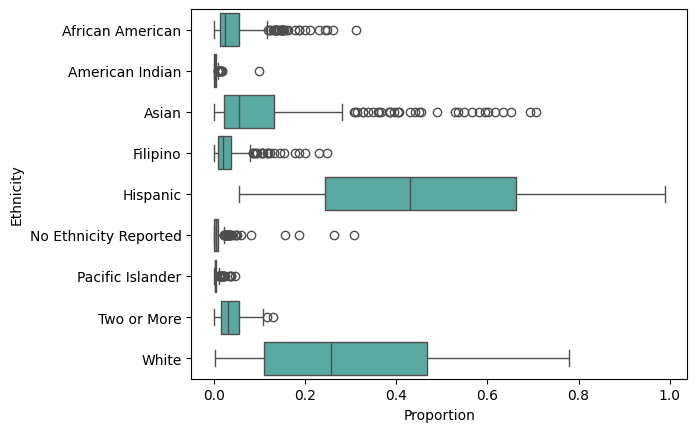

In [225]:
sns.boxplot(data=hs_eth_most, x='Proportion', y='Ethnicity', color = '#4db6ac')

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

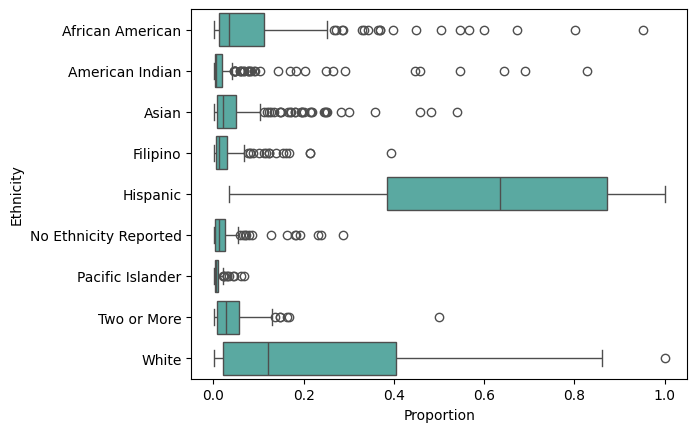

In [231]:
sns.boxplot(data=hs_eth_least, x='Proportion', y='Ethnicity', color = '#4db6ac')